In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

In [7]:
from tensorflow.keras import backend as K

from tensorflow.keras.models import model_from_json

import os

import matplotlib.pyplot as plt

import numpy as np

from sklearn import metrics
import time

from PIL import Image

In [8]:
img_width, img_height = 150, 150

In [12]:
train_data_dir = 'D:\\chest_xray\\train'

In [13]:
test_data_dir = 'D:\\chest_xray\\test'

In [11]:
nb_train_samples = 2000

In [15]:
validation_data_dir = 'D:\\chest_xray\\val'

In [16]:
nb_validation_samples = 800

In [17]:
batch_size = 16  

In [18]:
epochs = 5  

In [19]:
test_generator_samples = 300

In [20]:
test_batch_size = 25

In [21]:
K.image_data_format()    
K.backend()
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:                                        
    input_shape = (img_width, img_height, 3)


'channels_last'

'tensorflow'

In [22]:
model = Sequential()

In [23]:
model.add(Input(shape =input_shape ))

In [24]:
model.add(Conv2D(
	             filters=32,                # For every filter there is set of weights
	                                        # For each filter, one bias. So total bias = 32
	             kernel_size=(3, 3),        # For each filter there are 3*3=9 kernel_weights
	             strides = (1,1),           # So output shape will be 148 X 148 (W-F+1).
	                                        # Default strides is 1 only
	             #input_shape=input_shape,   # (150,150,3)
	             use_bias=True,             # Default value is True
	             padding='valid',           # 'valid' => No padding. This is default.
	             name="Ist_conv_layer"
	             )
         )

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(Activation('relu'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(MaxPool2D(pool_size=(2, 2)))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(Conv2D(32,
                (3, 3),
                activation = 'relu',
                name = "IInd_con_layer"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(MaxPool2D(pool_size=(2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [33]:
model.add(Conv2D(64, (3, 3), name = "IIIrd_conv_layer"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)        1

In [35]:
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten(name = "FlattenedLayer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)        1

In [36]:
model.add(Dense(64))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)        1

In [37]:
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.summary()
model.add(Dense(1))
model.summary()
model.add(Activation('sigmoid'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)        1

In [38]:
model.compile(
              loss='binary_crossentropy',
              optimizer='rmsprop',         
              metrics=['accuracy'])       

In [39]:
def preprocess(img):
    return img

In [40]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,
                              preprocessing_function=preprocess
                              )

In [41]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,     
                                               target_size=(img_width, img_height),  # Resize images
                                               batch_size=batch_size,  # Return images in batches
                                               class_mode='binary'   # Output labels will be 1D binary labels
                                                
                                                )


Found 5216 images belonging to 2 classes.


In [42]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [43]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),   # Resize images
                                                     batch_size=batch_size,    # batch size to augment at a time
                                                     class_mode='binary'  # Return 1D array of class labels
                                                     )

Found 16 images belonging to 2 classes.


In [44]:
start = time.time()
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    
    for x_batch, y_batch in train_generator:

        # Earlier learnt weights are preserved
        # between batches
        model.fit(x_batch, y_batch)
        batches += 1
        print ("Epoch: {0} , Batches: {1}".format(e,batches))
        
        if batches > 200:    
            break

end = time.time()
(end - start)/60

Epoch 0
1/1 [==============================] - 1s 1s/step - loss: 0.7168 - accuracy: 0.4375


Epoch: 0 , Batches: 1
1/1 [==============================] - 0s 94ms/step - loss: 2.2453 - accuracy: 0.6875


Epoch: 0 , Batches: 2
1/1 [==============================] - 0s 109ms/step - loss: 0.8504 - accuracy: 0.2500


Epoch: 0 , Batches: 3
1/1 [==============================] - 0s 87ms/step - loss: 0.5621 - accuracy: 0.8125


Epoch: 0 , Batches: 4
1/1 [==============================] - 0s 101ms/step - loss: 0.4126 - accuracy: 0.8125


Epoch: 0 , Batches: 5
1/1 [==============================] - 0s 94ms/step - loss: 0.7573 - accuracy: 0.6875


Epoch: 0 , Batches: 6
1/1 [==============================] - 0s 88ms/step - loss: 0.6357 - accuracy: 0.7500


Epoch: 0 , Batches: 7
1/1 [==============================] - 0s 97ms/step - loss: 0.7562 - accuracy: 0.5625


Epoch: 0 , Batches: 8
1/1 [==============================] - 0s 81ms/step - loss: 0.6649 - accuracy: 0.5625


Epoch: 0 , Batches: 9
1/1 [==============================] - 0s 108ms/step - loss: 0.6095 - accuracy: 0.7500


Epoch: 0 , Batches: 10
1/1 [==============================] - 0s 105ms/step - loss: 0.5330 - accuracy: 0.8125


Epoch: 0 , Batches: 11
1/1 [==============================] - 0s 94ms/step - loss: 0.5389 - accuracy: 0.8125


Epoch: 0 , Batches: 12
1/1 [==============================] - 0s 94ms/step - loss: 0.6676 - accuracy: 0.6875


Epoch: 0 , Batches: 13
1/1 [==============================] - 0s 94ms/step - loss: 0.5419 - accuracy: 0.8125


Epoch: 0 , Batches: 14
1/1 [==============================] - 0s 94ms/step - loss: 0.5780 - accuracy: 0.8750


Epoch: 0 , Batches: 15
1/1 [==============================] - 0s 94ms/step - loss: 0.3927 - accuracy: 0.8750


Epoch: 0 , Batches: 16
1/1 [==============================] - 0s 94ms/step - loss: 0.9710 - accuracy: 0.6250


Epoch: 0 , Batches: 17
1/1 [==============================] - 0s 83ms/step - loss: 0.5732 - accuracy: 0.8125


Epoch: 0 , Batches: 18
1/1 [==============================] - 0s 94ms/step - loss: 0.5365 - accuracy: 0.8125


Epoch: 0 , Batches: 19
1/1 [==============================] - 0s 78ms/step - loss: 0.4798 - accuracy: 0.8125


Epoch: 0 , Batches: 20
1/1 [==============================] - 0s 86ms/step - loss: 0.4446 - accuracy: 0.8750


Epoch: 0 , Batches: 21
1/1 [==============================] - 0s 94ms/step - loss: 0.6923 - accuracy: 0.7500


Epoch: 0 , Batches: 22
1/1 [==============================] - 0s 94ms/step - loss: 0.5973 - accuracy: 0.7500


Epoch: 0 , Batches: 23
1/1 [==============================] - 0s 94ms/step - loss: 0.5316 - accuracy: 0.8125


Epoch: 0 , Batches: 24
1/1 [==============================] - 0s 96ms/step - loss: 0.5448 - accuracy: 0.7500


Epoch: 0 , Batches: 25
1/1 [==============================] - 0s 84ms/step - loss: 0.5025 - accuracy: 0.8125


Epoch: 0 , Batches: 26
1/1 [==============================] - 0s 94ms/step - loss: 0.5658 - accuracy: 0.7500


Epoch: 0 , Batches: 27
1/1 [==============================] - 0s 92ms/step - loss: 0.5945 - accuracy: 0.8125


Epoch: 0 , Batches: 28
1/1 [==============================] - 0s 78ms/step - loss: 0.7716 - accuracy: 0.5000


Epoch: 0 , Batches: 29
1/1 [==============================] - 0s 94ms/step - loss: 0.6612 - accuracy: 0.6250


Epoch: 0 , Batches: 30
1/1 [==============================] - 0s 106ms/step - loss: 0.6515 - accuracy: 0.6875


Epoch: 0 , Batches: 31
1/1 [==============================] - 0s 85ms/step - loss: 0.5570 - accuracy: 0.8750


Epoch: 0 , Batches: 32
1/1 [==============================] - 0s 106ms/step - loss: 0.5828 - accuracy: 0.8125


Epoch: 0 , Batches: 33
1/1 [==============================] - 0s 94ms/step - loss: 0.5972 - accuracy: 0.6875


Epoch: 0 , Batches: 34
1/1 [==============================] - 0s 94ms/step - loss: 0.6225 - accuracy: 0.6875


Epoch: 0 , Batches: 35
1/1 [==============================] - 0s 94ms/step - loss: 0.4394 - accuracy: 0.8750


Epoch: 0 , Batches: 36
1/1 [==============================] - 0s 94ms/step - loss: 0.5169 - accuracy: 0.8125


Epoch: 0 , Batches: 37
1/1 [==============================] - 0s 94ms/step - loss: 0.8240 - accuracy: 0.6250


Epoch: 0 , Batches: 38
1/1 [==============================] - 0s 78ms/step - loss: 0.6113 - accuracy: 0.7500


Epoch: 0 , Batches: 39
1/1 [==============================] - 0s 94ms/step - loss: 0.5837 - accuracy: 0.8125


Epoch: 0 , Batches: 40
1/1 [==============================] - 0s 94ms/step - loss: 0.5725 - accuracy: 0.7500


Epoch: 0 , Batches: 41
1/1 [==============================] - 0s 94ms/step - loss: 0.4720 - accuracy: 0.8750


Epoch: 0 , Batches: 42
1/1 [==============================] - 0s 94ms/step - loss: 0.9508 - accuracy: 0.6875


Epoch: 0 , Batches: 43
1/1 [==============================] - 0s 94ms/step - loss: 0.6397 - accuracy: 0.6875


Epoch: 0 , Batches: 44
1/1 [==============================] - 0s 94ms/step - loss: 0.7072 - accuracy: 0.5625


Epoch: 0 , Batches: 45
1/1 [==============================] - 0s 94ms/step - loss: 0.5909 - accuracy: 0.7500


Epoch: 0 , Batches: 46
1/1 [==============================] - 0s 93ms/step - loss: 0.6132 - accuracy: 0.6875


Epoch: 0 , Batches: 47
1/1 [==============================] - 0s 94ms/step - loss: 0.5927 - accuracy: 0.7500


Epoch: 0 , Batches: 48
1/1 [==============================] - 0s 94ms/step - loss: 0.5878 - accuracy: 0.7500


Epoch: 0 , Batches: 49
1/1 [==============================] - 0s 94ms/step - loss: 0.5361 - accuracy: 0.7500


Epoch: 0 , Batches: 50
1/1 [==============================] - 0s 94ms/step - loss: 0.5755 - accuracy: 0.7500


Epoch: 0 , Batches: 51
1/1 [==============================] - 0s 103ms/step - loss: 0.5956 - accuracy: 0.7500


Epoch: 0 , Batches: 52
1/1 [==============================] - 0s 96ms/step - loss: 0.6570 - accuracy: 0.7500


Epoch: 0 , Batches: 53
1/1 [==============================] - 0s 78ms/step - loss: 0.7217 - accuracy: 0.5625


Epoch: 0 , Batches: 54
1/1 [==============================] - 0s 94ms/step - loss: 0.6589 - accuracy: 0.6875


Epoch: 0 , Batches: 55
1/1 [==============================] - 0s 103ms/step - loss: 0.5366 - accuracy: 0.8125


Epoch: 0 , Batches: 56
1/1 [==============================] - 0s 101ms/step - loss: 0.8860 - accuracy: 0.6250


Epoch: 0 , Batches: 57
1/1 [==============================] - 0s 110ms/step - loss: 0.6032 - accuracy: 0.7500


Epoch: 0 , Batches: 58
1/1 [==============================] - 0s 92ms/step - loss: 0.6205 - accuracy: 0.6875


Epoch: 0 , Batches: 59
1/1 [==============================] - 0s 105ms/step - loss: 0.7739 - accuracy: 0.5625


Epoch: 0 , Batches: 60
1/1 [==============================] - 0s 100ms/step - loss: 0.6484 - accuracy: 0.6875


Epoch: 0 , Batches: 61
1/1 [==============================] - 0s 95ms/step - loss: 0.6030 - accuracy: 0.7500


Epoch: 0 , Batches: 62
1/1 [==============================] - 0s 93ms/step - loss: 0.5474 - accuracy: 0.8125


Epoch: 0 , Batches: 63
1/1 [==============================] - 0s 102ms/step - loss: 0.6939 - accuracy: 0.7500


Epoch: 0 , Batches: 64
1/1 [==============================] - 0s 96ms/step - loss: 0.5877 - accuracy: 0.7500


Epoch: 0 , Batches: 65
1/1 [==============================] - 0s 97ms/step - loss: 0.3724 - accuracy: 0.9375


Epoch: 0 , Batches: 66
1/1 [==============================] - 0s 104ms/step - loss: 1.0792 - accuracy: 0.6250


Epoch: 0 , Batches: 67
1/1 [==============================] - 0s 107ms/step - loss: 0.5829 - accuracy: 0.8750


Epoch: 0 , Batches: 68
1/1 [==============================] - 0s 94ms/step - loss: 0.4992 - accuracy: 0.8750


Epoch: 0 , Batches: 69
1/1 [==============================] - 0s 101ms/step - loss: 0.5627 - accuracy: 0.6875


Epoch: 0 , Batches: 70
1/1 [==============================] - 0s 87ms/step - loss: 0.8002 - accuracy: 0.5000


Epoch: 0 , Batches: 71
1/1 [==============================] - 0s 94ms/step - loss: 0.6422 - accuracy: 0.6875


Epoch: 0 , Batches: 72
1/1 [==============================] - 0s 95ms/step - loss: 0.5567 - accuracy: 0.8125


Epoch: 0 , Batches: 73
1/1 [==============================] - 0s 99ms/step - loss: 0.5025 - accuracy: 0.8125


Epoch: 0 , Batches: 74
1/1 [==============================] - 0s 96ms/step - loss: 0.3459 - accuracy: 0.9375


Epoch: 0 , Batches: 75
1/1 [==============================] - 0s 104ms/step - loss: 0.9011 - accuracy: 0.8125


Epoch: 0 , Batches: 76
1/1 [==============================] - 0s 101ms/step - loss: 0.5486 - accuracy: 0.8750


Epoch: 0 , Batches: 77
1/1 [==============================] - 0s 108ms/step - loss: 0.5605 - accuracy: 0.7500


Epoch: 0 , Batches: 78
1/1 [==============================] - 0s 104ms/step - loss: 0.4847 - accuracy: 0.8750


Epoch: 0 , Batches: 79
1/1 [==============================] - 0s 95ms/step - loss: 0.2824 - accuracy: 0.9375


Epoch: 0 , Batches: 80
1/1 [==============================] - 0s 95ms/step - loss: 0.4981 - accuracy: 0.7500


Epoch: 0 , Batches: 81
1/1 [==============================] - 0s 100ms/step - loss: 0.7377 - accuracy: 0.6250


Epoch: 0 , Batches: 82
1/1 [==============================] - 0s 102ms/step - loss: 1.2502 - accuracy: 0.3125


Epoch: 0 , Batches: 83
1/1 [==============================] - 0s 87ms/step - loss: 0.5620 - accuracy: 0.7500


Epoch: 0 , Batches: 84
1/1 [==============================] - 0s 86ms/step - loss: 0.5439 - accuracy: 0.7500


Epoch: 0 , Batches: 85
1/1 [==============================] - 0s 101ms/step - loss: 0.5025 - accuracy: 0.8125


Epoch: 0 , Batches: 86
1/1 [==============================] - 0s 90ms/step - loss: 0.4919 - accuracy: 0.8125


Epoch: 0 , Batches: 87
1/1 [==============================] - 0s 100ms/step - loss: 0.4725 - accuracy: 0.8750


Epoch: 0 , Batches: 88
1/1 [==============================] - 0s 91ms/step - loss: 0.6013 - accuracy: 0.6875


Epoch: 0 , Batches: 89
1/1 [==============================] - 0s 95ms/step - loss: 0.5746 - accuracy: 0.7500


Epoch: 0 , Batches: 90
1/1 [==============================] - 0s 100ms/step - loss: 0.5739 - accuracy: 0.6875


Epoch: 0 , Batches: 91
1/1 [==============================] - 0s 90ms/step - loss: 0.5091 - accuracy: 0.7500


Epoch: 0 , Batches: 92
1/1 [==============================] - 0s 91ms/step - loss: 0.3151 - accuracy: 0.9375


Epoch: 0 , Batches: 93
1/1 [==============================] - 0s 90ms/step - loss: 1.2912 - accuracy: 0.5000


Epoch: 0 , Batches: 94
1/1 [==============================] - 0s 83ms/step - loss: 0.6087 - accuracy: 0.6875


Epoch: 0 , Batches: 95
1/1 [==============================] - 0s 101ms/step - loss: 0.5008 - accuracy: 0.7500


Epoch: 0 , Batches: 96
1/1 [==============================] - 0s 99ms/step - loss: 0.5695 - accuracy: 0.7500


Epoch: 0 , Batches: 97
1/1 [==============================] - 0s 95ms/step - loss: 0.6911 - accuracy: 0.6250


Epoch: 0 , Batches: 98
1/1 [==============================] - 0s 97ms/step - loss: 0.5171 - accuracy: 0.8750


Epoch: 0 , Batches: 99
1/1 [==============================] - 0s 99ms/step - loss: 0.4492 - accuracy: 0.8125


Epoch: 0 , Batches: 100
1/1 [==============================] - 0s 83ms/step - loss: 0.4347 - accuracy: 0.8125


Epoch: 0 , Batches: 101
1/1 [==============================] - 0s 84ms/step - loss: 0.7317 - accuracy: 0.5625


Epoch: 0 , Batches: 102
1/1 [==============================] - 0s 84ms/step - loss: 0.6549 - accuracy: 0.6250


Epoch: 0 , Batches: 103
1/1 [==============================] - 0s 93ms/step - loss: 0.4961 - accuracy: 0.9375


Epoch: 0 , Batches: 104
1/1 [==============================] - 0s 101ms/step - loss: 0.5344 - accuracy: 0.6875


Epoch: 0 , Batches: 105
1/1 [==============================] - 0s 112ms/step - loss: 0.4069 - accuracy: 0.8750


Epoch: 0 , Batches: 106
1/1 [==============================] - 0s 104ms/step - loss: 0.7349 - accuracy: 0.5625


Epoch: 0 , Batches: 107
1/1 [==============================] - 0s 78ms/step - loss: 0.5479 - accuracy: 0.8750


Epoch: 0 , Batches: 108
1/1 [==============================] - 0s 95ms/step - loss: 0.4338 - accuracy: 0.8750


Epoch: 0 , Batches: 109
1/1 [==============================] - 0s 94ms/step - loss: 0.5808 - accuracy: 0.6875


Epoch: 0 , Batches: 110
1/1 [==============================] - 0s 86ms/step - loss: 0.4600 - accuracy: 0.8750


Epoch: 0 , Batches: 111
1/1 [==============================] - 0s 98ms/step - loss: 0.4219 - accuracy: 0.8125


Epoch: 0 , Batches: 112
1/1 [==============================] - 0s 85ms/step - loss: 0.4141 - accuracy: 0.8125


Epoch: 0 , Batches: 113
1/1 [==============================] - 0s 96ms/step - loss: 0.4067 - accuracy: 0.8125


Epoch: 0 , Batches: 114
1/1 [==============================] - 0s 88ms/step - loss: 0.4313 - accuracy: 0.8125


Epoch: 0 , Batches: 115
1/1 [==============================] - 0s 82ms/step - loss: 0.3879 - accuracy: 0.7500


Epoch: 0 , Batches: 116
1/1 [==============================] - 0s 101ms/step - loss: 0.3737 - accuracy: 0.8750


Epoch: 0 , Batches: 117
1/1 [==============================] - 0s 103ms/step - loss: 0.3270 - accuracy: 0.8750


Epoch: 0 , Batches: 118
1/1 [==============================] - 0s 101ms/step - loss: 0.5393 - accuracy: 0.6875


Epoch: 0 , Batches: 119
1/1 [==============================] - 0s 85ms/step - loss: 0.4338 - accuracy: 0.8750


Epoch: 0 , Batches: 120
1/1 [==============================] - 0s 100ms/step - loss: 0.4528 - accuracy: 0.8125


Epoch: 0 , Batches: 121
1/1 [==============================] - 0s 97ms/step - loss: 0.4051 - accuracy: 0.8750


Epoch: 0 , Batches: 122
1/1 [==============================] - 0s 108ms/step - loss: 0.3485 - accuracy: 0.8750


Epoch: 0 , Batches: 123
1/1 [==============================] - 0s 100ms/step - loss: 0.3185 - accuracy: 0.8125


Epoch: 0 , Batches: 124
1/1 [==============================] - 0s 98ms/step - loss: 0.5151 - accuracy: 0.7500


Epoch: 0 , Batches: 125
1/1 [==============================] - 0s 88ms/step - loss: 0.4241 - accuracy: 0.7500


Epoch: 0 , Batches: 126
1/1 [==============================] - 0s 96ms/step - loss: 0.4775 - accuracy: 0.8750


Epoch: 0 , Batches: 127
1/1 [==============================] - 0s 100ms/step - loss: 0.3860 - accuracy: 0.7500


Epoch: 0 , Batches: 128
1/1 [==============================] - 0s 101ms/step - loss: 0.5029 - accuracy: 0.7500


Epoch: 0 , Batches: 129
1/1 [==============================] - 0s 97ms/step - loss: 0.6134 - accuracy: 0.7500


Epoch: 0 , Batches: 130
1/1 [==============================] - 0s 102ms/step - loss: 0.3611 - accuracy: 0.8750


Epoch: 0 , Batches: 131
1/1 [==============================] - 0s 94ms/step - loss: 0.5567 - accuracy: 0.8125


Epoch: 0 , Batches: 132
1/1 [==============================] - 0s 109ms/step - loss: 0.3034 - accuracy: 0.8750


Epoch: 0 , Batches: 133
1/1 [==============================] - 0s 109ms/step - loss: 0.4172 - accuracy: 0.6875


Epoch: 0 , Batches: 134
1/1 [==============================] - 0s 94ms/step - loss: 0.4313 - accuracy: 0.8125


Epoch: 0 , Batches: 135
1/1 [==============================] - 0s 109ms/step - loss: 0.6307 - accuracy: 0.6250


Epoch: 0 , Batches: 136
1/1 [==============================] - 0s 94ms/step - loss: 0.5929 - accuracy: 0.7500


Epoch: 0 , Batches: 137
1/1 [==============================] - 0s 94ms/step - loss: 0.3872 - accuracy: 0.7500


Epoch: 0 , Batches: 138
1/1 [==============================] - 0s 94ms/step - loss: 0.5118 - accuracy: 0.6875


Epoch: 0 , Batches: 139
1/1 [==============================] - 0s 94ms/step - loss: 0.2959 - accuracy: 0.8750


Epoch: 0 , Batches: 140
1/1 [==============================] - 0s 94ms/step - loss: 0.5191 - accuracy: 0.7500


Epoch: 0 , Batches: 141
1/1 [==============================] - 0s 109ms/step - loss: 0.5633 - accuracy: 0.8125


Epoch: 0 , Batches: 142
1/1 [==============================] - 0s 94ms/step - loss: 0.3809 - accuracy: 0.8750


Epoch: 0 , Batches: 143
1/1 [==============================] - 0s 94ms/step - loss: 0.4068 - accuracy: 0.7500


Epoch: 0 , Batches: 144
1/1 [==============================] - 0s 94ms/step - loss: 0.3480 - accuracy: 0.8750


Epoch: 0 , Batches: 145
1/1 [==============================] - 0s 109ms/step - loss: 0.2255 - accuracy: 0.9375


Epoch: 0 , Batches: 146
1/1 [==============================] - 0s 94ms/step - loss: 0.4916 - accuracy: 0.8750


Epoch: 0 , Batches: 147
1/1 [==============================] - 0s 94ms/step - loss: 0.6999 - accuracy: 0.5000


Epoch: 0 , Batches: 148
1/1 [==============================] - 0s 94ms/step - loss: 0.4174 - accuracy: 0.8750


Epoch: 0 , Batches: 149
1/1 [==============================] - 0s 94ms/step - loss: 0.5873 - accuracy: 0.6875


Epoch: 0 , Batches: 150
1/1 [==============================] - 0s 94ms/step - loss: 0.3954 - accuracy: 0.8750


Epoch: 0 , Batches: 151
1/1 [==============================] - 0s 94ms/step - loss: 0.9169 - accuracy: 0.6250


Epoch: 0 , Batches: 152
1/1 [==============================] - 0s 94ms/step - loss: 0.4040 - accuracy: 0.9375


Epoch: 0 , Batches: 153
1/1 [==============================] - 0s 94ms/step - loss: 0.1580 - accuracy: 1.0000


Epoch: 0 , Batches: 154
1/1 [==============================] - 0s 94ms/step - loss: 0.4109 - accuracy: 0.6875


Epoch: 0 , Batches: 155
1/1 [==============================] - 0s 109ms/step - loss: 0.4348 - accuracy: 0.8125


Epoch: 0 , Batches: 156
1/1 [==============================] - 0s 109ms/step - loss: 0.6533 - accuracy: 0.6875


Epoch: 0 , Batches: 157
1/1 [==============================] - 0s 94ms/step - loss: 0.3737 - accuracy: 0.8750


Epoch: 0 , Batches: 158
1/1 [==============================] - 0s 94ms/step - loss: 0.2619 - accuracy: 0.9375


Epoch: 0 , Batches: 159
1/1 [==============================] - 0s 94ms/step - loss: 0.3844 - accuracy: 0.8750


Epoch: 0 , Batches: 160
1/1 [==============================] - 0s 109ms/step - loss: 0.2804 - accuracy: 0.8750


Epoch: 0 , Batches: 161
1/1 [==============================] - 0s 99ms/step - loss: 0.2376 - accuracy: 0.8750


Epoch: 0 , Batches: 162
1/1 [==============================] - 0s 95ms/step - loss: 0.0384 - accuracy: 1.0000


Epoch: 0 , Batches: 163
1/1 [==============================] - 0s 82ms/step - loss: 0.4711 - accuracy: 0.6875


Epoch: 0 , Batches: 164
1/1 [==============================] - 0s 103ms/step - loss: 0.5561 - accuracy: 0.7500


Epoch: 0 , Batches: 165
1/1 [==============================] - 0s 102ms/step - loss: 0.2985 - accuracy: 0.8750


Epoch: 0 , Batches: 166
1/1 [==============================] - 0s 92ms/step - loss: 0.3439 - accuracy: 0.8125


Epoch: 0 , Batches: 167
1/1 [==============================] - 0s 95ms/step - loss: 0.3038 - accuracy: 0.8750


Epoch: 0 , Batches: 168
1/1 [==============================] - 0s 92ms/step - loss: 0.4426 - accuracy: 0.7500


Epoch: 0 , Batches: 169
1/1 [==============================] - 0s 97ms/step - loss: 0.2147 - accuracy: 0.9375


Epoch: 0 , Batches: 170
1/1 [==============================] - 0s 90ms/step - loss: 0.1722 - accuracy: 0.9375


Epoch: 0 , Batches: 171
1/1 [==============================] - 0s 104ms/step - loss: 0.3211 - accuracy: 0.8125


Epoch: 0 , Batches: 172
1/1 [==============================] - 0s 90ms/step - loss: 0.3884 - accuracy: 0.8125


Epoch: 0 , Batches: 173
1/1 [==============================] - 0s 92ms/step - loss: 0.2464 - accuracy: 0.8750


Epoch: 0 , Batches: 174
1/1 [==============================] - 0s 91ms/step - loss: 0.2766 - accuracy: 0.8750


Epoch: 0 , Batches: 175
1/1 [==============================] - 0s 93ms/step - loss: 0.2307 - accuracy: 0.8750


Epoch: 0 , Batches: 176
1/1 [==============================] - 0s 91ms/step - loss: 0.2935 - accuracy: 0.8750


Epoch: 0 , Batches: 177
1/1 [==============================] - 0s 97ms/step - loss: 0.2721 - accuracy: 0.8750


Epoch: 0 , Batches: 178
1/1 [==============================] - 0s 85ms/step - loss: 0.3757 - accuracy: 0.8750


Epoch: 0 , Batches: 179
1/1 [==============================] - 0s 93ms/step - loss: 0.3946 - accuracy: 0.8750


Epoch: 0 , Batches: 180
1/1 [==============================] - 0s 94ms/step - loss: 0.5056 - accuracy: 0.6875


Epoch: 0 , Batches: 181
1/1 [==============================] - 0s 91ms/step - loss: 0.2961 - accuracy: 0.9375


Epoch: 0 , Batches: 182
1/1 [==============================] - 0s 83ms/step - loss: 0.2992 - accuracy: 0.8750


Epoch: 0 , Batches: 183
1/1 [==============================] - 0s 92ms/step - loss: 0.3674 - accuracy: 0.8750


Epoch: 0 , Batches: 184
1/1 [==============================] - 0s 90ms/step - loss: 0.1453 - accuracy: 1.0000


Epoch: 0 , Batches: 185
1/1 [==============================] - 0s 93ms/step - loss: 0.3061 - accuracy: 0.8125


Epoch: 0 , Batches: 186
1/1 [==============================] - 0s 83ms/step - loss: 0.3947 - accuracy: 0.8125


Epoch: 0 , Batches: 187
1/1 [==============================] - 0s 94ms/step - loss: 0.3948 - accuracy: 0.7500


Epoch: 0 , Batches: 188
1/1 [==============================] - 0s 104ms/step - loss: 0.3930 - accuracy: 0.8125


Epoch: 0 , Batches: 189
1/1 [==============================] - 0s 94ms/step - loss: 0.3552 - accuracy: 0.8125


Epoch: 0 , Batches: 190
1/1 [==============================] - 0s 115ms/step - loss: 0.3467 - accuracy: 0.9375


Epoch: 0 , Batches: 191
1/1 [==============================] - 0s 110ms/step - loss: 0.3005 - accuracy: 0.8750


Epoch: 0 , Batches: 192
1/1 [==============================] - 0s 104ms/step - loss: 0.2308 - accuracy: 0.8750


Epoch: 0 , Batches: 193
1/1 [==============================] - 0s 91ms/step - loss: 0.3671 - accuracy: 0.6875


Epoch: 0 , Batches: 194
1/1 [==============================] - 0s 94ms/step - loss: 0.7683 - accuracy: 0.6875


Epoch: 0 , Batches: 195
1/1 [==============================] - 0s 78ms/step - loss: 0.2003 - accuracy: 0.9375


Epoch: 0 , Batches: 196
1/1 [==============================] - 0s 93ms/step - loss: 0.2369 - accuracy: 0.9375


Epoch: 0 , Batches: 197
1/1 [==============================] - 0s 76ms/step - loss: 0.1952 - accuracy: 1.0000


Epoch: 0 , Batches: 198
1/1 [==============================] - 0s 91ms/step - loss: 0.4904 - accuracy: 0.7500


Epoch: 0 , Batches: 199
1/1 [==============================] - 0s 88ms/step - loss: 0.3800 - accuracy: 0.8125


Epoch: 0 , Batches: 200
1/1 [==============================] - 0s 77ms/step - loss: 0.1086 - accuracy: 0.9375


Epoch: 0 , Batches: 201
Epoch 1
1/1 [==============================] - 0s 86ms/step - loss: 0.1411 - accuracy: 1.0000


Epoch: 1 , Batches: 1
1/1 [==============================] - 0s 80ms/step - loss: 0.3352 - accuracy: 0.9375


Epoch: 1 , Batches: 2
1/1 [==============================] - 0s 77ms/step - loss: 0.2579 - accuracy: 0.8750


Epoch: 1 , Batches: 3
1/1 [==============================] - 0s 93ms/step - loss: 0.0551 - accuracy: 1.0000


Epoch: 1 , Batches: 4
1/1 [==============================] - 0s 93ms/step - loss: 0.2643 - accuracy: 0.8750


Epoch: 1 , Batches: 5
1/1 [==============================] - 0s 96ms/step - loss: 0.3160 - accuracy: 0.8125


Epoch: 1 , Batches: 6
1/1 [==============================] - 0s 91ms/step - loss: 1.0102 - accuracy: 0.7500


Epoch: 1 , Batches: 7
1/1 [==============================] - 0s 94ms/step - loss: 0.3943 - accuracy: 0.8750


Epoch: 1 , Batches: 8
1/1 [==============================] - 0s 93ms/step - loss: 0.3936 - accuracy: 0.7500


Epoch: 1 , Batches: 9
1/1 [==============================] - 0s 91ms/step - loss: 0.1610 - accuracy: 1.0000


Epoch: 1 , Batches: 10
1/1 [==============================] - 0s 94ms/step - loss: 0.3580 - accuracy: 0.6875


Epoch: 1 , Batches: 11
1/1 [==============================] - 0s 92ms/step - loss: 0.3524 - accuracy: 0.8750


Epoch: 1 , Batches: 12
1/1 [==============================] - 0s 88ms/step - loss: 0.1802 - accuracy: 0.9375


Epoch: 1 , Batches: 13
1/1 [==============================] - 0s 90ms/step - loss: 0.3855 - accuracy: 0.8125


Epoch: 1 , Batches: 14
1/1 [==============================] - 0s 83ms/step - loss: 0.3948 - accuracy: 0.8750


Epoch: 1 , Batches: 15
1/1 [==============================] - 0s 92ms/step - loss: 0.1860 - accuracy: 0.9375


Epoch: 1 , Batches: 16
1/1 [==============================] - 0s 94ms/step - loss: 0.5688 - accuracy: 0.8125


Epoch: 1 , Batches: 17
1/1 [==============================] - 0s 105ms/step - loss: 0.5248 - accuracy: 0.8125


Epoch: 1 , Batches: 18
1/1 [==============================] - 0s 94ms/step - loss: 0.3603 - accuracy: 0.8125


Epoch: 1 , Batches: 19
1/1 [==============================] - 0s 94ms/step - loss: 0.3993 - accuracy: 0.8750


Epoch: 1 , Batches: 20
1/1 [==============================] - 0s 99ms/step - loss: 0.2116 - accuracy: 0.8750


Epoch: 1 , Batches: 21
1/1 [==============================] - 0s 101ms/step - loss: 0.3213 - accuracy: 0.9375


Epoch: 1 , Batches: 22
1/1 [==============================] - 0s 101ms/step - loss: 0.2857 - accuracy: 0.8750


Epoch: 1 , Batches: 23
1/1 [==============================] - 0s 100ms/step - loss: 0.2567 - accuracy: 0.9375


Epoch: 1 , Batches: 24
1/1 [==============================] - 0s 93ms/step - loss: 0.3234 - accuracy: 0.7500


Epoch: 1 , Batches: 25
1/1 [==============================] - 0s 107ms/step - loss: 0.6307 - accuracy: 0.6875


Epoch: 1 , Batches: 26
1/1 [==============================] - 0s 77ms/step - loss: 0.7443 - accuracy: 0.6250


Epoch: 1 , Batches: 27
1/1 [==============================] - 0s 99ms/step - loss: 0.1829 - accuracy: 0.9375


Epoch: 1 , Batches: 28
1/1 [==============================] - 0s 96ms/step - loss: 0.3449 - accuracy: 0.8125


Epoch: 1 , Batches: 29
1/1 [==============================] - 0s 84ms/step - loss: 0.3379 - accuracy: 0.8750


Epoch: 1 , Batches: 30
1/1 [==============================] - 0s 97ms/step - loss: 0.2846 - accuracy: 0.9375


Epoch: 1 , Batches: 31
1/1 [==============================] - 0s 93ms/step - loss: 0.3916 - accuracy: 0.8125


Epoch: 1 , Batches: 32
1/1 [==============================] - 0s 97ms/step - loss: 0.4729 - accuracy: 0.7500


Epoch: 1 , Batches: 33
1/1 [==============================] - 0s 101ms/step - loss: 0.1999 - accuracy: 0.8750


Epoch: 1 , Batches: 34
1/1 [==============================] - 0s 81ms/step - loss: 0.3933 - accuracy: 0.8125


Epoch: 1 , Batches: 35
1/1 [==============================] - 0s 100ms/step - loss: 0.1893 - accuracy: 1.0000


Epoch: 1 , Batches: 36
1/1 [==============================] - 0s 98ms/step - loss: 0.2653 - accuracy: 0.8125


Epoch: 1 , Batches: 37
1/1 [==============================] - 0s 100ms/step - loss: 0.1994 - accuracy: 0.9375


Epoch: 1 , Batches: 38
1/1 [==============================] - 0s 94ms/step - loss: 0.2555 - accuracy: 0.8750


Epoch: 1 , Batches: 39
1/1 [==============================] - 0s 96ms/step - loss: 0.1814 - accuracy: 0.9375


Epoch: 1 , Batches: 40
1/1 [==============================] - 0s 104ms/step - loss: 0.3779 - accuracy: 0.8750


Epoch: 1 , Batches: 41
1/1 [==============================] - 0s 94ms/step - loss: 0.2895 - accuracy: 0.8750


Epoch: 1 , Batches: 42
1/1 [==============================] - 0s 94ms/step - loss: 0.7216 - accuracy: 0.7500


Epoch: 1 , Batches: 43
1/1 [==============================] - 0s 94ms/step - loss: 0.3287 - accuracy: 0.9375


Epoch: 1 , Batches: 44
1/1 [==============================] - 0s 94ms/step - loss: 0.6429 - accuracy: 0.6250


Epoch: 1 , Batches: 45
1/1 [==============================] - 0s 88ms/step - loss: 0.3436 - accuracy: 0.8750


Epoch: 1 , Batches: 46
1/1 [==============================] - 0s 78ms/step - loss: 0.2430 - accuracy: 0.9375


Epoch: 1 , Batches: 47
1/1 [==============================] - 0s 76ms/step - loss: 0.2479 - accuracy: 0.9375


Epoch: 1 , Batches: 48
1/1 [==============================] - 0s 94ms/step - loss: 0.1154 - accuracy: 1.0000


Epoch: 1 , Batches: 49
1/1 [==============================] - 0s 112ms/step - loss: 0.0837 - accuracy: 0.9375


Epoch: 1 , Batches: 50
1/1 [==============================] - 0s 103ms/step - loss: 0.2032 - accuracy: 0.8750


Epoch: 1 , Batches: 51
1/1 [==============================] - 0s 94ms/step - loss: 0.2498 - accuracy: 0.9375


Epoch: 1 , Batches: 52
1/1 [==============================] - 0s 94ms/step - loss: 0.3797 - accuracy: 0.8125


Epoch: 1 , Batches: 53
1/1 [==============================] - 0s 83ms/step - loss: 0.2707 - accuracy: 0.8750


Epoch: 1 , Batches: 54
1/1 [==============================] - 0s 94ms/step - loss: 0.3954 - accuracy: 0.8125


Epoch: 1 , Batches: 55
1/1 [==============================] - 0s 92ms/step - loss: 0.2955 - accuracy: 0.8750


Epoch: 1 , Batches: 56
1/1 [==============================] - 0s 93ms/step - loss: 0.2120 - accuracy: 0.9375


Epoch: 1 , Batches: 57
1/1 [==============================] - 0s 93ms/step - loss: 0.2969 - accuracy: 0.8125


Epoch: 1 , Batches: 58
1/1 [==============================] - 0s 94ms/step - loss: 0.2589 - accuracy: 0.8750


Epoch: 1 , Batches: 59
1/1 [==============================] - 0s 93ms/step - loss: 0.1812 - accuracy: 0.9375


Epoch: 1 , Batches: 60
1/1 [==============================] - 0s 112ms/step - loss: 0.1653 - accuracy: 0.9375


Epoch: 1 , Batches: 61
1/1 [==============================] - 0s 100ms/step - loss: 0.2679 - accuracy: 0.8125


Epoch: 1 , Batches: 62
1/1 [==============================] - 0s 87ms/step - loss: 0.2899 - accuracy: 0.8125


Epoch: 1 , Batches: 63
1/1 [==============================] - 0s 91ms/step - loss: 0.3751 - accuracy: 0.8125


Epoch: 1 , Batches: 64
1/1 [==============================] - 0s 79ms/step - loss: 0.2501 - accuracy: 0.9375


Epoch: 1 , Batches: 65
1/1 [==============================] - 0s 90ms/step - loss: 0.2371 - accuracy: 0.9375


Epoch: 1 , Batches: 66
1/1 [==============================] - 0s 101ms/step - loss: 0.8935 - accuracy: 0.6875


Epoch: 1 , Batches: 67
1/1 [==============================] - 0s 96ms/step - loss: 0.2045 - accuracy: 0.9375


Epoch: 1 , Batches: 68
1/1 [==============================] - 0s 90ms/step - loss: 0.2422 - accuracy: 0.8750


Epoch: 1 , Batches: 69
1/1 [==============================] - 0s 98ms/step - loss: 0.4272 - accuracy: 0.7500


Epoch: 1 , Batches: 70
1/1 [==============================] - 0s 92ms/step - loss: 0.3416 - accuracy: 0.8750


Epoch: 1 , Batches: 71
1/1 [==============================] - 0s 92ms/step - loss: 0.4331 - accuracy: 0.8125


Epoch: 1 , Batches: 72
1/1 [==============================] - 0s 88ms/step - loss: 0.1861 - accuracy: 1.0000


Epoch: 1 , Batches: 73
1/1 [==============================] - 0s 79ms/step - loss: 0.4105 - accuracy: 0.7500


Epoch: 1 , Batches: 74
1/1 [==============================] - 0s 109ms/step - loss: 0.0915 - accuracy: 1.0000


Epoch: 1 , Batches: 75
1/1 [==============================] - 0s 89ms/step - loss: 0.4298 - accuracy: 0.6875


Epoch: 1 , Batches: 76
1/1 [==============================] - 0s 91ms/step - loss: 0.1673 - accuracy: 1.0000


Epoch: 1 , Batches: 77
1/1 [==============================] - 0s 89ms/step - loss: 0.0949 - accuracy: 1.0000


Epoch: 1 , Batches: 78
1/1 [==============================] - 0s 90ms/step - loss: 0.1372 - accuracy: 1.0000


Epoch: 1 , Batches: 79
1/1 [==============================] - 0s 97ms/step - loss: 0.1287 - accuracy: 1.0000


Epoch: 1 , Batches: 80
1/1 [==============================] - 0s 94ms/step - loss: 0.2148 - accuracy: 0.9375


Epoch: 1 , Batches: 81
1/1 [==============================] - 0s 86ms/step - loss: 1.1914 - accuracy: 0.6250


Epoch: 1 , Batches: 82
1/1 [==============================] - 0s 80ms/step - loss: 0.6852 - accuracy: 0.8125


Epoch: 1 , Batches: 83
1/1 [==============================] - 0s 94ms/step - loss: 0.3852 - accuracy: 0.8125


Epoch: 1 , Batches: 84
1/1 [==============================] - 0s 97ms/step - loss: 0.3379 - accuracy: 0.8125


Epoch: 1 , Batches: 85
1/1 [==============================] - 0s 100ms/step - loss: 0.1395 - accuracy: 0.9375


Epoch: 1 , Batches: 86
1/1 [==============================] - 0s 95ms/step - loss: 0.2992 - accuracy: 0.8125


Epoch: 1 , Batches: 87
1/1 [==============================] - 0s 100ms/step - loss: 0.3683 - accuracy: 0.6875


Epoch: 1 , Batches: 88
1/1 [==============================] - 0s 94ms/step - loss: 0.3943 - accuracy: 0.8750


Epoch: 1 , Batches: 89
1/1 [==============================] - 0s 94ms/step - loss: 0.3200 - accuracy: 0.8750


Epoch: 1 , Batches: 90
1/1 [==============================] - 0s 94ms/step - loss: 0.4089 - accuracy: 0.7500


Epoch: 1 , Batches: 91
1/1 [==============================] - 0s 94ms/step - loss: 0.2732 - accuracy: 0.8750


Epoch: 1 , Batches: 92
1/1 [==============================] - 0s 94ms/step - loss: 0.2457 - accuracy: 0.9375


Epoch: 1 , Batches: 93
1/1 [==============================] - 0s 94ms/step - loss: 0.3930 - accuracy: 0.8125


Epoch: 1 , Batches: 94
1/1 [==============================] - 0s 94ms/step - loss: 0.4281 - accuracy: 0.8125


Epoch: 1 , Batches: 95
1/1 [==============================] - 0s 94ms/step - loss: 0.3685 - accuracy: 0.8125


Epoch: 1 , Batches: 96
1/1 [==============================] - 0s 94ms/step - loss: 0.2083 - accuracy: 0.9375


Epoch: 1 , Batches: 97
1/1 [==============================] - 0s 94ms/step - loss: 0.2557 - accuracy: 0.9375


Epoch: 1 , Batches: 98
1/1 [==============================] - 0s 94ms/step - loss: 0.0739 - accuracy: 0.9375


Epoch: 1 , Batches: 99
1/1 [==============================] - 0s 94ms/step - loss: 0.2549 - accuracy: 0.8750


Epoch: 1 , Batches: 100
1/1 [==============================] - 0s 94ms/step - loss: 0.5056 - accuracy: 0.7500


Epoch: 1 , Batches: 101
1/1 [==============================] - 0s 94ms/step - loss: 0.3017 - accuracy: 0.8750


Epoch: 1 , Batches: 102
1/1 [==============================] - 0s 94ms/step - loss: 0.3428 - accuracy: 0.8125


Epoch: 1 , Batches: 103
1/1 [==============================] - 0s 94ms/step - loss: 0.7278 - accuracy: 0.6250


Epoch: 1 , Batches: 104
1/1 [==============================] - 0s 94ms/step - loss: 0.2105 - accuracy: 0.9375


Epoch: 1 , Batches: 105
1/1 [==============================] - 0s 94ms/step - loss: 0.2213 - accuracy: 0.9375


Epoch: 1 , Batches: 106
1/1 [==============================] - 0s 94ms/step - loss: 0.3090 - accuracy: 0.8125


Epoch: 1 , Batches: 107
1/1 [==============================] - 0s 94ms/step - loss: 0.1521 - accuracy: 1.0000


Epoch: 1 , Batches: 108
1/1 [==============================] - 0s 94ms/step - loss: 0.3491 - accuracy: 0.8125


Epoch: 1 , Batches: 109
1/1 [==============================] - 0s 94ms/step - loss: 0.1859 - accuracy: 0.9375


Epoch: 1 , Batches: 110
1/1 [==============================] - 0s 94ms/step - loss: 0.1119 - accuracy: 1.0000


Epoch: 1 , Batches: 111
1/1 [==============================] - 0s 94ms/step - loss: 0.5630 - accuracy: 0.7500


Epoch: 1 , Batches: 112
1/1 [==============================] - 0s 94ms/step - loss: 0.1990 - accuracy: 0.9375


Epoch: 1 , Batches: 113
1/1 [==============================] - 0s 94ms/step - loss: 0.2189 - accuracy: 0.8750


Epoch: 1 , Batches: 114
1/1 [==============================] - 0s 94ms/step - loss: 0.1691 - accuracy: 0.8750


Epoch: 1 , Batches: 115
1/1 [==============================] - 0s 97ms/step - loss: 0.0850 - accuracy: 1.0000


Epoch: 1 , Batches: 116
1/1 [==============================] - 0s 94ms/step - loss: 0.2593 - accuracy: 1.0000


Epoch: 1 , Batches: 117
1/1 [==============================] - 0s 103ms/step - loss: 0.6073 - accuracy: 0.7500


Epoch: 1 , Batches: 118
1/1 [==============================] - 0s 111ms/step - loss: 0.4185 - accuracy: 0.8125


Epoch: 1 , Batches: 119
1/1 [==============================] - 0s 109ms/step - loss: 0.6916 - accuracy: 0.6875


Epoch: 1 , Batches: 120
1/1 [==============================] - 0s 95ms/step - loss: 0.3784 - accuracy: 0.8125


Epoch: 1 , Batches: 121
1/1 [==============================] - 0s 84ms/step - loss: 0.1474 - accuracy: 0.9375


Epoch: 1 , Batches: 122
1/1 [==============================] - 0s 92ms/step - loss: 0.2798 - accuracy: 0.9375


Epoch: 1 , Batches: 123
1/1 [==============================] - 0s 99ms/step - loss: 0.4526 - accuracy: 0.6250


Epoch: 1 , Batches: 124
1/1 [==============================] - 0s 94ms/step - loss: 0.1854 - accuracy: 0.9375


Epoch: 1 , Batches: 125
1/1 [==============================] - 0s 95ms/step - loss: 0.2599 - accuracy: 0.9375


Epoch: 1 , Batches: 126
1/1 [==============================] - 0s 88ms/step - loss: 0.2893 - accuracy: 0.9375


Epoch: 1 , Batches: 127
1/1 [==============================] - 0s 96ms/step - loss: 0.3262 - accuracy: 0.9375


Epoch: 1 , Batches: 128
1/1 [==============================] - 0s 86ms/step - loss: 0.1911 - accuracy: 0.9375


Epoch: 1 , Batches: 129
1/1 [==============================] - 0s 90ms/step - loss: 0.2402 - accuracy: 0.8750


Epoch: 1 , Batches: 130
1/1 [==============================] - 0s 87ms/step - loss: 0.1872 - accuracy: 1.0000


Epoch: 1 , Batches: 131
1/1 [==============================] - 0s 101ms/step - loss: 0.1046 - accuracy: 0.9375


Epoch: 1 , Batches: 132
1/1 [==============================] - 0s 78ms/step - loss: 0.2651 - accuracy: 0.9375


Epoch: 1 , Batches: 133
1/1 [==============================] - 0s 94ms/step - loss: 0.1201 - accuracy: 0.9375


Epoch: 1 , Batches: 134
1/1 [==============================] - 0s 94ms/step - loss: 0.2709 - accuracy: 0.8750


Epoch: 1 , Batches: 135
1/1 [==============================] - 0s 94ms/step - loss: 0.3394 - accuracy: 0.8750


Epoch: 1 , Batches: 136
1/1 [==============================] - 0s 78ms/step - loss: 0.1035 - accuracy: 0.9375


Epoch: 1 , Batches: 137
1/1 [==============================] - 0s 94ms/step - loss: 0.3961 - accuracy: 0.8750


Epoch: 1 , Batches: 138
1/1 [==============================] - 0s 94ms/step - loss: 0.1079 - accuracy: 1.0000


Epoch: 1 , Batches: 139
1/1 [==============================] - 0s 83ms/step - loss: 0.0899 - accuracy: 0.9375


Epoch: 1 , Batches: 140
1/1 [==============================] - 0s 93ms/step - loss: 0.0871 - accuracy: 0.9375


Epoch: 1 , Batches: 141
1/1 [==============================] - 0s 101ms/step - loss: 0.2840 - accuracy: 0.9375


Epoch: 1 , Batches: 142
1/1 [==============================] - 0s 104ms/step - loss: 0.1727 - accuracy: 1.0000


Epoch: 1 , Batches: 143
1/1 [==============================] - 0s 94ms/step - loss: 0.2753 - accuracy: 0.8125


Epoch: 1 , Batches: 144
1/1 [==============================] - 0s 100ms/step - loss: 0.1705 - accuracy: 1.0000


Epoch: 1 , Batches: 145
1/1 [==============================] - 0s 99ms/step - loss: 0.1125 - accuracy: 1.0000


Epoch: 1 , Batches: 146
1/1 [==============================] - 0s 94ms/step - loss: 0.3596 - accuracy: 0.8750


Epoch: 1 , Batches: 147
1/1 [==============================] - 0s 109ms/step - loss: 0.4080 - accuracy: 0.8125


Epoch: 1 , Batches: 148
1/1 [==============================] - 0s 115ms/step - loss: 0.5532 - accuracy: 0.8125


Epoch: 1 , Batches: 149
1/1 [==============================] - 0s 94ms/step - loss: 0.3976 - accuracy: 0.8125


Epoch: 1 , Batches: 150
1/1 [==============================] - 0s 82ms/step - loss: 0.2523 - accuracy: 0.8750


Epoch: 1 , Batches: 151
1/1 [==============================] - 0s 101ms/step - loss: 0.2190 - accuracy: 0.9375


Epoch: 1 , Batches: 152
1/1 [==============================] - 0s 94ms/step - loss: 0.5096 - accuracy: 0.7500


Epoch: 1 , Batches: 153
1/1 [==============================] - 0s 101ms/step - loss: 0.1863 - accuracy: 0.8750


Epoch: 1 , Batches: 154
1/1 [==============================] - 0s 109ms/step - loss: 0.2198 - accuracy: 0.9375


Epoch: 1 , Batches: 155
1/1 [==============================] - 0s 100ms/step - loss: 0.4748 - accuracy: 0.7500


Epoch: 1 , Batches: 156
1/1 [==============================] - 0s 107ms/step - loss: 0.2238 - accuracy: 0.9375


Epoch: 1 , Batches: 157
1/1 [==============================] - 0s 103ms/step - loss: 0.4840 - accuracy: 0.8125


Epoch: 1 , Batches: 158
1/1 [==============================] - 0s 94ms/step - loss: 0.4494 - accuracy: 0.8125


Epoch: 1 , Batches: 159
1/1 [==============================] - 0s 103ms/step - loss: 0.2346 - accuracy: 0.9375


Epoch: 1 , Batches: 160
1/1 [==============================] - 0s 93ms/step - loss: 0.2984 - accuracy: 0.8125


Epoch: 1 , Batches: 161
1/1 [==============================] - 0s 78ms/step - loss: 0.2271 - accuracy: 0.8750


Epoch: 1 , Batches: 162
1/1 [==============================] - 0s 90ms/step - loss: 0.2448 - accuracy: 0.9375


Epoch: 1 , Batches: 163
1/1 [==============================] - 0s 92ms/step - loss: 0.3949 - accuracy: 0.7500


Epoch: 1 , Batches: 164
1/1 [==============================] - 0s 94ms/step - loss: 0.0174 - accuracy: 1.0000


Epoch: 1 , Batches: 165
1/1 [==============================] - 0s 80ms/step - loss: 0.6863 - accuracy: 0.7500


Epoch: 1 , Batches: 166
1/1 [==============================] - 0s 81ms/step - loss: 0.2054 - accuracy: 0.8750


Epoch: 1 , Batches: 167
1/1 [==============================] - 0s 78ms/step - loss: 0.1539 - accuracy: 0.9375


Epoch: 1 , Batches: 168
1/1 [==============================] - 0s 94ms/step - loss: 0.2496 - accuracy: 0.9375


Epoch: 1 , Batches: 169
1/1 [==============================] - 0s 94ms/step - loss: 0.8745 - accuracy: 0.6875


Epoch: 1 , Batches: 170
1/1 [==============================] - 0s 88ms/step - loss: 0.3146 - accuracy: 0.8750


Epoch: 1 , Batches: 171
1/1 [==============================] - 0s 94ms/step - loss: 0.1491 - accuracy: 0.9375


Epoch: 1 , Batches: 172
1/1 [==============================] - 0s 94ms/step - loss: 0.1907 - accuracy: 0.9375


Epoch: 1 , Batches: 173
1/1 [==============================] - 0s 94ms/step - loss: 0.1886 - accuracy: 0.9375


Epoch: 1 , Batches: 174
1/1 [==============================] - 0s 94ms/step - loss: 0.6944 - accuracy: 0.6875


Epoch: 1 , Batches: 175
1/1 [==============================] - 0s 94ms/step - loss: 0.2616 - accuracy: 0.8750


Epoch: 1 , Batches: 176
1/1 [==============================] - 0s 94ms/step - loss: 0.2245 - accuracy: 0.9375


Epoch: 1 , Batches: 177
1/1 [==============================] - 0s 94ms/step - loss: 0.3106 - accuracy: 0.7500


Epoch: 1 , Batches: 178
1/1 [==============================] - 0s 78ms/step - loss: 0.2574 - accuracy: 0.8125


Epoch: 1 , Batches: 179
1/1 [==============================] - 0s 94ms/step - loss: 0.2705 - accuracy: 0.8125


Epoch: 1 , Batches: 180
1/1 [==============================] - 0s 94ms/step - loss: 0.4638 - accuracy: 0.7500


Epoch: 1 , Batches: 181
1/1 [==============================] - 0s 81ms/step - loss: 0.4457 - accuracy: 0.7500


Epoch: 1 , Batches: 182
1/1 [==============================] - 0s 94ms/step - loss: 0.1660 - accuracy: 1.0000


Epoch: 1 , Batches: 183
1/1 [==============================] - 0s 94ms/step - loss: 0.4415 - accuracy: 0.6875


Epoch: 1 , Batches: 184
1/1 [==============================] - 0s 78ms/step - loss: 0.3782 - accuracy: 0.6875


Epoch: 1 , Batches: 185
1/1 [==============================] - 0s 78ms/step - loss: 0.2219 - accuracy: 0.8750


Epoch: 1 , Batches: 186
1/1 [==============================] - 0s 94ms/step - loss: 0.2376 - accuracy: 0.8750


Epoch: 1 , Batches: 187
1/1 [==============================] - 0s 94ms/step - loss: 0.3958 - accuracy: 0.6875


Epoch: 1 , Batches: 188
1/1 [==============================] - 0s 94ms/step - loss: 0.2575 - accuracy: 0.8125


Epoch: 1 , Batches: 189
1/1 [==============================] - 0s 94ms/step - loss: 0.1030 - accuracy: 0.9375


Epoch: 1 , Batches: 190
1/1 [==============================] - 0s 94ms/step - loss: 0.2403 - accuracy: 0.8750


Epoch: 1 , Batches: 191
1/1 [==============================] - 0s 94ms/step - loss: 0.3547 - accuracy: 0.8125


Epoch: 1 , Batches: 192
1/1 [==============================] - 0s 94ms/step - loss: 0.1203 - accuracy: 0.9375


Epoch: 1 , Batches: 193
1/1 [==============================] - 0s 94ms/step - loss: 0.4813 - accuracy: 0.6875


Epoch: 1 , Batches: 194
1/1 [==============================] - 0s 94ms/step - loss: 0.2584 - accuracy: 1.0000


Epoch: 1 , Batches: 195
1/1 [==============================] - 0s 94ms/step - loss: 0.2962 - accuracy: 0.8750


Epoch: 1 , Batches: 196
1/1 [==============================] - 0s 94ms/step - loss: 0.2324 - accuracy: 0.8125


Epoch: 1 , Batches: 197
1/1 [==============================] - 0s 88ms/step - loss: 0.2919 - accuracy: 0.8125


Epoch: 1 , Batches: 198
1/1 [==============================] - 0s 78ms/step - loss: 0.1374 - accuracy: 0.9375


Epoch: 1 , Batches: 199
1/1 [==============================] - 0s 94ms/step - loss: 0.1505 - accuracy: 1.0000


Epoch: 1 , Batches: 200
1/1 [==============================] - 0s 78ms/step - loss: 0.3433 - accuracy: 0.8125


Epoch: 1 , Batches: 201
Epoch 2
1/1 [==============================] - 0s 94ms/step - loss: 0.3203 - accuracy: 0.8750


Epoch: 2 , Batches: 1
1/1 [==============================] - 0s 94ms/step - loss: 0.2876 - accuracy: 0.8125


Epoch: 2 , Batches: 2
1/1 [==============================] - 0s 94ms/step - loss: 0.0846 - accuracy: 0.9375


Epoch: 2 , Batches: 3
1/1 [==============================] - 0s 78ms/step - loss: 0.1352 - accuracy: 0.9375


Epoch: 2 , Batches: 4
1/1 [==============================] - 0s 94ms/step - loss: 0.3269 - accuracy: 0.9375


Epoch: 2 , Batches: 5
1/1 [==============================] - 0s 94ms/step - loss: 0.1526 - accuracy: 0.9375


Epoch: 2 , Batches: 6
1/1 [==============================] - 0s 94ms/step - loss: 0.6118 - accuracy: 0.8750


Epoch: 2 , Batches: 7
1/1 [==============================] - 0s 94ms/step - loss: 0.3971 - accuracy: 0.6875


Epoch: 2 , Batches: 8
1/1 [==============================] - 0s 94ms/step - loss: 0.2199 - accuracy: 0.9375


Epoch: 2 , Batches: 9
1/1 [==============================] - 0s 94ms/step - loss: 0.3094 - accuracy: 0.8750


Epoch: 2 , Batches: 10
1/1 [==============================] - 0s 94ms/step - loss: 0.3103 - accuracy: 0.8125


Epoch: 2 , Batches: 11
1/1 [==============================] - 0s 94ms/step - loss: 0.3073 - accuracy: 0.8750


Epoch: 2 , Batches: 12
1/1 [==============================] - 0s 94ms/step - loss: 0.1501 - accuracy: 0.9375


Epoch: 2 , Batches: 13
1/1 [==============================] - 0s 90ms/step - loss: 0.2166 - accuracy: 0.9375


Epoch: 2 , Batches: 14
1/1 [==============================] - 0s 94ms/step - loss: 0.4724 - accuracy: 0.7500


Epoch: 2 , Batches: 15
1/1 [==============================] - 0s 94ms/step - loss: 0.4483 - accuracy: 0.8750


Epoch: 2 , Batches: 16
1/1 [==============================] - 0s 88ms/step - loss: 0.3282 - accuracy: 0.8750


Epoch: 2 , Batches: 17
1/1 [==============================] - 0s 78ms/step - loss: 0.5548 - accuracy: 0.8125


Epoch: 2 , Batches: 18
1/1 [==============================] - 0s 94ms/step - loss: 0.2779 - accuracy: 0.8125


Epoch: 2 , Batches: 19
1/1 [==============================] - 0s 94ms/step - loss: 0.1475 - accuracy: 1.0000


Epoch: 2 , Batches: 20
1/1 [==============================] - 0s 94ms/step - loss: 0.2786 - accuracy: 0.8125


Epoch: 2 , Batches: 21
1/1 [==============================] - 0s 94ms/step - loss: 0.3006 - accuracy: 0.8125


Epoch: 2 , Batches: 22
1/1 [==============================] - 0s 78ms/step - loss: 0.0942 - accuracy: 1.0000


Epoch: 2 , Batches: 23
1/1 [==============================] - 0s 94ms/step - loss: 0.1818 - accuracy: 1.0000


Epoch: 2 , Batches: 24
1/1 [==============================] - 0s 94ms/step - loss: 0.2913 - accuracy: 0.8125


Epoch: 2 , Batches: 25
1/1 [==============================] - 0s 94ms/step - loss: 0.3393 - accuracy: 0.8750


Epoch: 2 , Batches: 26
1/1 [==============================] - 0s 94ms/step - loss: 0.2154 - accuracy: 0.8125


Epoch: 2 , Batches: 27
1/1 [==============================] - 0s 94ms/step - loss: 0.3327 - accuracy: 0.8125


Epoch: 2 , Batches: 28
1/1 [==============================] - 0s 78ms/step - loss: 0.1227 - accuracy: 0.9375


Epoch: 2 , Batches: 29
1/1 [==============================] - 0s 94ms/step - loss: 0.3440 - accuracy: 0.8125


Epoch: 2 , Batches: 30
1/1 [==============================] - 0s 94ms/step - loss: 0.1860 - accuracy: 0.9375


Epoch: 2 , Batches: 31
1/1 [==============================] - 0s 94ms/step - loss: 0.2647 - accuracy: 0.8750


Epoch: 2 , Batches: 32
1/1 [==============================] - 0s 94ms/step - loss: 0.2542 - accuracy: 0.8750


Epoch: 2 , Batches: 33
1/1 [==============================] - 0s 94ms/step - loss: 0.2238 - accuracy: 0.8125


Epoch: 2 , Batches: 34
1/1 [==============================] - 0s 94ms/step - loss: 0.0865 - accuracy: 1.0000


Epoch: 2 , Batches: 35
1/1 [==============================] - 0s 78ms/step - loss: 0.3327 - accuracy: 0.8125


Epoch: 2 , Batches: 36
1/1 [==============================] - 0s 94ms/step - loss: 0.4708 - accuracy: 0.8125


Epoch: 2 , Batches: 37
1/1 [==============================] - 0s 93ms/step - loss: 0.3281 - accuracy: 0.8750


Epoch: 2 , Batches: 38
1/1 [==============================] - 0s 94ms/step - loss: 0.2414 - accuracy: 0.8750


Epoch: 2 , Batches: 39
1/1 [==============================] - 0s 94ms/step - loss: 0.3119 - accuracy: 0.8125


Epoch: 2 , Batches: 40
1/1 [==============================] - 0s 94ms/step - loss: 0.2157 - accuracy: 0.8750


Epoch: 2 , Batches: 41
1/1 [==============================] - 0s 94ms/step - loss: 0.2499 - accuracy: 0.8750


Epoch: 2 , Batches: 42
1/1 [==============================] - 0s 94ms/step - loss: 0.1620 - accuracy: 0.9375


Epoch: 2 , Batches: 43
1/1 [==============================] - 0s 94ms/step - loss: 0.4598 - accuracy: 0.8125


Epoch: 2 , Batches: 44
1/1 [==============================] - 0s 78ms/step - loss: 0.1892 - accuracy: 0.9375


Epoch: 2 , Batches: 45
1/1 [==============================] - 0s 94ms/step - loss: 0.1943 - accuracy: 0.8750


Epoch: 2 , Batches: 46
1/1 [==============================] - 0s 89ms/step - loss: 0.2552 - accuracy: 0.9375


Epoch: 2 , Batches: 47
1/1 [==============================] - 0s 88ms/step - loss: 0.1271 - accuracy: 0.9375


Epoch: 2 , Batches: 48
1/1 [==============================] - 0s 94ms/step - loss: 0.1385 - accuracy: 1.0000


Epoch: 2 , Batches: 49
1/1 [==============================] - 0s 94ms/step - loss: 0.2954 - accuracy: 0.8750


Epoch: 2 , Batches: 50
1/1 [==============================] - 0s 93ms/step - loss: 0.1178 - accuracy: 1.0000


Epoch: 2 , Batches: 51
1/1 [==============================] - 0s 92ms/step - loss: 0.1340 - accuracy: 0.9375


Epoch: 2 , Batches: 52
1/1 [==============================] - 0s 94ms/step - loss: 0.1991 - accuracy: 0.9375


Epoch: 2 , Batches: 53
1/1 [==============================] - 0s 116ms/step - loss: 0.1003 - accuracy: 0.9375


Epoch: 2 , Batches: 54
1/1 [==============================] - 0s 78ms/step - loss: 0.2725 - accuracy: 0.8750


Epoch: 2 , Batches: 55
1/1 [==============================] - 0s 94ms/step - loss: 0.0740 - accuracy: 1.0000


Epoch: 2 , Batches: 56
1/1 [==============================] - 0s 94ms/step - loss: 0.1634 - accuracy: 0.9375


Epoch: 2 , Batches: 57
1/1 [==============================] - 0s 94ms/step - loss: 0.6370 - accuracy: 0.8125


Epoch: 2 , Batches: 58
1/1 [==============================] - 0s 94ms/step - loss: 0.4125 - accuracy: 0.7500


Epoch: 2 , Batches: 59
1/1 [==============================] - 0s 78ms/step - loss: 0.2812 - accuracy: 0.8750


Epoch: 2 , Batches: 60
1/1 [==============================] - 0s 94ms/step - loss: 0.1984 - accuracy: 0.9375


Epoch: 2 , Batches: 61
1/1 [==============================] - 0s 94ms/step - loss: 0.2075 - accuracy: 0.8750


Epoch: 2 , Batches: 62
1/1 [==============================] - 0s 109ms/step - loss: 0.1250 - accuracy: 1.0000


Epoch: 2 , Batches: 63
1/1 [==============================] - 0s 94ms/step - loss: 0.2068 - accuracy: 0.9375


Epoch: 2 , Batches: 64
1/1 [==============================] - 0s 99ms/step - loss: 0.0421 - accuracy: 1.0000


Epoch: 2 , Batches: 65
1/1 [==============================] - 0s 99ms/step - loss: 0.2692 - accuracy: 0.8750


Epoch: 2 , Batches: 66
1/1 [==============================] - 0s 80ms/step - loss: 0.3996 - accuracy: 0.8125


Epoch: 2 , Batches: 67
1/1 [==============================] - 0s 94ms/step - loss: 0.1082 - accuracy: 1.0000


Epoch: 2 , Batches: 68
1/1 [==============================] - 0s 94ms/step - loss: 0.1341 - accuracy: 0.9375


Epoch: 2 , Batches: 69
1/1 [==============================] - 0s 81ms/step - loss: 0.3632 - accuracy: 0.9375


Epoch: 2 , Batches: 70
1/1 [==============================] - 0s 94ms/step - loss: 0.1623 - accuracy: 0.9375


Epoch: 2 , Batches: 71
1/1 [==============================] - 0s 98ms/step - loss: 0.1883 - accuracy: 0.8750


Epoch: 2 , Batches: 72
1/1 [==============================] - 0s 94ms/step - loss: 0.6007 - accuracy: 0.8125


Epoch: 2 , Batches: 73
1/1 [==============================] - 0s 93ms/step - loss: 0.1686 - accuracy: 0.9375


Epoch: 2 , Batches: 74
1/1 [==============================] - 0s 88ms/step - loss: 0.1115 - accuracy: 0.9375


Epoch: 2 , Batches: 75
1/1 [==============================] - 0s 94ms/step - loss: 0.3727 - accuracy: 0.8125


Epoch: 2 , Batches: 76
1/1 [==============================] - 0s 93ms/step - loss: 0.4666 - accuracy: 0.8750


Epoch: 2 , Batches: 77
1/1 [==============================] - 0s 99ms/step - loss: 0.6885 - accuracy: 0.7500


Epoch: 2 , Batches: 78
1/1 [==============================] - 0s 78ms/step - loss: 0.3002 - accuracy: 0.9375


Epoch: 2 , Batches: 79
1/1 [==============================] - 0s 94ms/step - loss: 0.3786 - accuracy: 0.8125


Epoch: 2 , Batches: 80
1/1 [==============================] - 0s 94ms/step - loss: 0.1118 - accuracy: 1.0000


Epoch: 2 , Batches: 81
1/1 [==============================] - 0s 100ms/step - loss: 0.0860 - accuracy: 1.0000


Epoch: 2 , Batches: 82
1/1 [==============================] - 0s 95ms/step - loss: 0.0785 - accuracy: 1.0000


Epoch: 2 , Batches: 83
1/1 [==============================] - 0s 84ms/step - loss: 0.1163 - accuracy: 0.9375


Epoch: 2 , Batches: 84
1/1 [==============================] - 0s 108ms/step - loss: 0.4091 - accuracy: 0.8750


Epoch: 2 , Batches: 85
1/1 [==============================] - 0s 77ms/step - loss: 0.4094 - accuracy: 0.8125


Epoch: 2 , Batches: 86
1/1 [==============================] - 0s 90ms/step - loss: 0.4445 - accuracy: 0.7500


Epoch: 2 , Batches: 87
1/1 [==============================] - 0s 98ms/step - loss: 0.3168 - accuracy: 0.8750


Epoch: 2 , Batches: 88
1/1 [==============================] - 0s 107ms/step - loss: 0.2269 - accuracy: 0.9375


Epoch: 2 , Batches: 89
1/1 [==============================] - 0s 98ms/step - loss: 0.1613 - accuracy: 0.9375


Epoch: 2 , Batches: 90
1/1 [==============================] - 0s 92ms/step - loss: 0.3094 - accuracy: 0.9375


Epoch: 2 , Batches: 91
1/1 [==============================] - 0s 109ms/step - loss: 0.3018 - accuracy: 0.8125


Epoch: 2 , Batches: 92
1/1 [==============================] - 0s 105ms/step - loss: 0.4757 - accuracy: 0.7500


Epoch: 2 , Batches: 93
1/1 [==============================] - 0s 98ms/step - loss: 0.1440 - accuracy: 1.0000


Epoch: 2 , Batches: 94
1/1 [==============================] - 0s 78ms/step - loss: 0.2458 - accuracy: 0.8125


Epoch: 2 , Batches: 95
1/1 [==============================] - 0s 83ms/step - loss: 0.4074 - accuracy: 0.8125


Epoch: 2 , Batches: 96
1/1 [==============================] - 0s 104ms/step - loss: 0.1790 - accuracy: 0.9375


Epoch: 2 , Batches: 97
1/1 [==============================] - 0s 93ms/step - loss: 0.2199 - accuracy: 0.9375


Epoch: 2 , Batches: 98
1/1 [==============================] - 0s 99ms/step - loss: 0.2294 - accuracy: 0.8750


Epoch: 2 , Batches: 99
1/1 [==============================] - 0s 90ms/step - loss: 0.7093 - accuracy: 0.8750


Epoch: 2 , Batches: 100
1/1 [==============================] - 0s 99ms/step - loss: 0.2835 - accuracy: 0.9375


Epoch: 2 , Batches: 101
1/1 [==============================] - 0s 99ms/step - loss: 0.2429 - accuracy: 0.9375


Epoch: 2 , Batches: 102
1/1 [==============================] - 0s 88ms/step - loss: 0.2116 - accuracy: 0.9375


Epoch: 2 , Batches: 103
1/1 [==============================] - 0s 95ms/step - loss: 0.0774 - accuracy: 1.0000


Epoch: 2 , Batches: 104
1/1 [==============================] - 0s 96ms/step - loss: 0.0995 - accuracy: 0.9375


Epoch: 2 , Batches: 105
1/1 [==============================] - 0s 105ms/step - loss: 0.0844 - accuracy: 1.0000


Epoch: 2 , Batches: 106
1/1 [==============================] - 0s 92ms/step - loss: 0.1512 - accuracy: 0.8750


Epoch: 2 , Batches: 107
1/1 [==============================] - 0s 95ms/step - loss: 0.2081 - accuracy: 0.9375


Epoch: 2 , Batches: 108
1/1 [==============================] - 0s 99ms/step - loss: 0.4187 - accuracy: 0.8125


Epoch: 2 , Batches: 109
1/1 [==============================] - 0s 78ms/step - loss: 0.2861 - accuracy: 0.8750


Epoch: 2 , Batches: 110
1/1 [==============================] - 0s 78ms/step - loss: 0.2250 - accuracy: 0.8750


Epoch: 2 , Batches: 111
1/1 [==============================] - 0s 91ms/step - loss: 0.1760 - accuracy: 0.9375


Epoch: 2 , Batches: 112
1/1 [==============================] - 0s 91ms/step - loss: 0.3537 - accuracy: 0.8125


Epoch: 2 , Batches: 113
1/1 [==============================] - 0s 82ms/step - loss: 0.1490 - accuracy: 0.9375


Epoch: 2 , Batches: 114
1/1 [==============================] - 0s 90ms/step - loss: 0.2191 - accuracy: 0.8750


Epoch: 2 , Batches: 115
1/1 [==============================] - 0s 82ms/step - loss: 0.3170 - accuracy: 0.8750


Epoch: 2 , Batches: 116
1/1 [==============================] - 0s 100ms/step - loss: 0.7418 - accuracy: 0.6250


Epoch: 2 , Batches: 117
1/1 [==============================] - 0s 86ms/step - loss: 0.2093 - accuracy: 0.9375


Epoch: 2 , Batches: 118
1/1 [==============================] - 0s 99ms/step - loss: 0.2675 - accuracy: 0.8750


Epoch: 2 , Batches: 119
1/1 [==============================] - 0s 88ms/step - loss: 0.2682 - accuracy: 0.8125


Epoch: 2 , Batches: 120
1/1 [==============================] - 0s 93ms/step - loss: 0.4050 - accuracy: 0.8750


Epoch: 2 , Batches: 121
1/1 [==============================] - 0s 104ms/step - loss: 0.2390 - accuracy: 0.8750


Epoch: 2 , Batches: 122
1/1 [==============================] - 0s 99ms/step - loss: 0.1951 - accuracy: 0.9375


Epoch: 2 , Batches: 123
1/1 [==============================] - 0s 90ms/step - loss: 0.1784 - accuracy: 0.9375


Epoch: 2 , Batches: 124
1/1 [==============================] - 0s 93ms/step - loss: 0.1334 - accuracy: 0.9375


Epoch: 2 , Batches: 125
1/1 [==============================] - 0s 91ms/step - loss: 0.4871 - accuracy: 0.7500


Epoch: 2 , Batches: 126
1/1 [==============================] - 0s 96ms/step - loss: 0.4326 - accuracy: 0.8750


Epoch: 2 , Batches: 127
1/1 [==============================] - 0s 95ms/step - loss: 0.1039 - accuracy: 1.0000


Epoch: 2 , Batches: 128
1/1 [==============================] - 0s 82ms/step - loss: 0.1864 - accuracy: 0.8750


Epoch: 2 , Batches: 129
1/1 [==============================] - 0s 87ms/step - loss: 0.3042 - accuracy: 0.8750


Epoch: 2 , Batches: 130
1/1 [==============================] - 0s 83ms/step - loss: 0.2419 - accuracy: 0.9375


Epoch: 2 , Batches: 131
1/1 [==============================] - 0s 93ms/step - loss: 0.1188 - accuracy: 1.0000


Epoch: 2 , Batches: 132
1/1 [==============================] - 0s 87ms/step - loss: 0.7628 - accuracy: 0.7500


Epoch: 2 , Batches: 133
1/1 [==============================] - 0s 96ms/step - loss: 0.3047 - accuracy: 0.8750


Epoch: 2 , Batches: 134
1/1 [==============================] - 0s 97ms/step - loss: 0.1440 - accuracy: 0.9375


Epoch: 2 , Batches: 135
1/1 [==============================] - 0s 93ms/step - loss: 0.4414 - accuracy: 0.8125


Epoch: 2 , Batches: 136
1/1 [==============================] - 0s 82ms/step - loss: 0.3837 - accuracy: 0.8750


Epoch: 2 , Batches: 137
1/1 [==============================] - 0s 81ms/step - loss: 0.0832 - accuracy: 1.0000


Epoch: 2 , Batches: 138
1/1 [==============================] - 0s 91ms/step - loss: 0.2532 - accuracy: 0.9375


Epoch: 2 , Batches: 139
1/1 [==============================] - 0s 100ms/step - loss: 0.4930 - accuracy: 0.7500


Epoch: 2 , Batches: 140
1/1 [==============================] - 0s 82ms/step - loss: 0.5064 - accuracy: 0.8125


Epoch: 2 , Batches: 141
1/1 [==============================] - 0s 99ms/step - loss: 0.2492 - accuracy: 0.9375


Epoch: 2 , Batches: 142
1/1 [==============================] - 0s 95ms/step - loss: 0.3359 - accuracy: 0.9375


Epoch: 2 , Batches: 143
1/1 [==============================] - 0s 99ms/step - loss: 0.2486 - accuracy: 0.8750


Epoch: 2 , Batches: 144
1/1 [==============================] - 0s 82ms/step - loss: 0.2992 - accuracy: 0.8750


Epoch: 2 , Batches: 145
1/1 [==============================] - 0s 94ms/step - loss: 0.2534 - accuracy: 0.8125


Epoch: 2 , Batches: 146
1/1 [==============================] - 0s 110ms/step - loss: 0.1693 - accuracy: 0.9375


Epoch: 2 , Batches: 147
1/1 [==============================] - 0s 84ms/step - loss: 0.1716 - accuracy: 0.9375


Epoch: 2 , Batches: 148
1/1 [==============================] - 0s 89ms/step - loss: 0.1260 - accuracy: 0.9375


Epoch: 2 , Batches: 149
1/1 [==============================] - 0s 93ms/step - loss: 0.3432 - accuracy: 0.8750


Epoch: 2 , Batches: 150
1/1 [==============================] - 0s 88ms/step - loss: 0.2883 - accuracy: 0.8750


Epoch: 2 , Batches: 151
1/1 [==============================] - 0s 107ms/step - loss: 0.1793 - accuracy: 0.8750


Epoch: 2 , Batches: 152
1/1 [==============================] - 0s 93ms/step - loss: 0.2206 - accuracy: 0.9375


Epoch: 2 , Batches: 153
1/1 [==============================] - 0s 94ms/step - loss: 0.3102 - accuracy: 0.8750


Epoch: 2 , Batches: 154
1/1 [==============================] - 0s 111ms/step - loss: 0.4943 - accuracy: 0.8125


Epoch: 2 , Batches: 155
1/1 [==============================] - 0s 93ms/step - loss: 0.2968 - accuracy: 0.8750


Epoch: 2 , Batches: 156
1/1 [==============================] - 0s 93ms/step - loss: 0.3749 - accuracy: 0.8125


Epoch: 2 , Batches: 157
1/1 [==============================] - 0s 99ms/step - loss: 0.1737 - accuracy: 0.9375


Epoch: 2 , Batches: 158
1/1 [==============================] - 0s 92ms/step - loss: 0.0638 - accuracy: 1.0000


Epoch: 2 , Batches: 159
1/1 [==============================] - 0s 100ms/step - loss: 0.1500 - accuracy: 0.9375


Epoch: 2 , Batches: 160
1/1 [==============================] - 0s 78ms/step - loss: 0.2451 - accuracy: 0.9375


Epoch: 2 , Batches: 161
1/1 [==============================] - 0s 99ms/step - loss: 0.1865 - accuracy: 0.8125


Epoch: 2 , Batches: 162
1/1 [==============================] - 0s 87ms/step - loss: 0.1346 - accuracy: 0.9375


Epoch: 2 , Batches: 163
1/1 [==============================] - 0s 94ms/step - loss: 0.1811 - accuracy: 0.9375


Epoch: 2 , Batches: 164
1/1 [==============================] - 0s 94ms/step - loss: 0.2073 - accuracy: 0.8750


Epoch: 2 , Batches: 165
1/1 [==============================] - 0s 91ms/step - loss: 0.2189 - accuracy: 0.8125


Epoch: 2 , Batches: 166
1/1 [==============================] - 0s 92ms/step - loss: 0.3196 - accuracy: 0.9375


Epoch: 2 , Batches: 167
1/1 [==============================] - 0s 94ms/step - loss: 0.1443 - accuracy: 0.9375


Epoch: 2 , Batches: 168
1/1 [==============================] - 0s 94ms/step - loss: 0.3386 - accuracy: 0.8750


Epoch: 2 , Batches: 169
1/1 [==============================] - 0s 94ms/step - loss: 0.2374 - accuracy: 0.8750


Epoch: 2 , Batches: 170
1/1 [==============================] - 0s 94ms/step - loss: 0.3188 - accuracy: 0.7500


Epoch: 2 , Batches: 171
1/1 [==============================] - 0s 92ms/step - loss: 0.2668 - accuracy: 0.8125


Epoch: 2 , Batches: 172
1/1 [==============================] - 0s 94ms/step - loss: 0.1522 - accuracy: 0.8750


Epoch: 2 , Batches: 173
1/1 [==============================] - 0s 101ms/step - loss: 0.6079 - accuracy: 0.7500


Epoch: 2 , Batches: 174
1/1 [==============================] - 0s 95ms/step - loss: 0.2860 - accuracy: 0.8125


Epoch: 2 , Batches: 175
1/1 [==============================] - 0s 90ms/step - loss: 0.3774 - accuracy: 0.8750


Epoch: 2 , Batches: 176
1/1 [==============================] - 0s 94ms/step - loss: 0.2721 - accuracy: 0.8750


Epoch: 2 , Batches: 177
1/1 [==============================] - 0s 104ms/step - loss: 0.0906 - accuracy: 1.0000


Epoch: 2 , Batches: 178
1/1 [==============================] - 0s 100ms/step - loss: 0.1851 - accuracy: 0.9375


Epoch: 2 , Batches: 179
1/1 [==============================] - 0s 105ms/step - loss: 0.3617 - accuracy: 0.8750


Epoch: 2 , Batches: 180
1/1 [==============================] - 0s 94ms/step - loss: 0.1664 - accuracy: 0.9375


Epoch: 2 , Batches: 181
1/1 [==============================] - 0s 94ms/step - loss: 0.2228 - accuracy: 0.9375


Epoch: 2 , Batches: 182
1/1 [==============================] - 0s 94ms/step - loss: 0.3605 - accuracy: 0.8750


Epoch: 2 , Batches: 183
1/1 [==============================] - 0s 99ms/step - loss: 0.1036 - accuracy: 1.0000


Epoch: 2 , Batches: 184
1/1 [==============================] - 0s 79ms/step - loss: 0.1756 - accuracy: 0.9375


Epoch: 2 , Batches: 185
1/1 [==============================] - 0s 84ms/step - loss: 0.1652 - accuracy: 0.8750


Epoch: 2 , Batches: 186
1/1 [==============================] - 0s 94ms/step - loss: 0.1800 - accuracy: 0.8125


Epoch: 2 , Batches: 187
1/1 [==============================] - 0s 108ms/step - loss: 0.2635 - accuracy: 0.8125


Epoch: 2 , Batches: 188
1/1 [==============================] - 0s 105ms/step - loss: 0.2045 - accuracy: 0.9375


Epoch: 2 , Batches: 189
1/1 [==============================] - 0s 78ms/step - loss: 0.3617 - accuracy: 0.9375


Epoch: 2 , Batches: 190
1/1 [==============================] - 0s 94ms/step - loss: 0.1054 - accuracy: 1.0000


Epoch: 2 , Batches: 191
1/1 [==============================] - 0s 94ms/step - loss: 0.0508 - accuracy: 1.0000


Epoch: 2 , Batches: 192
1/1 [==============================] - 0s 94ms/step - loss: 0.2704 - accuracy: 0.8750


Epoch: 2 , Batches: 193
1/1 [==============================] - 0s 94ms/step - loss: 0.6118 - accuracy: 0.7500


Epoch: 2 , Batches: 194
1/1 [==============================] - 0s 94ms/step - loss: 0.4232 - accuracy: 0.8125


Epoch: 2 , Batches: 195
1/1 [==============================] - 0s 78ms/step - loss: 0.0683 - accuracy: 0.9375


Epoch: 2 , Batches: 196
1/1 [==============================] - 0s 94ms/step - loss: 0.3000 - accuracy: 0.9375


Epoch: 2 , Batches: 197
1/1 [==============================] - 0s 94ms/step - loss: 0.2143 - accuracy: 0.9375


Epoch: 2 , Batches: 198
1/1 [==============================] - 0s 115ms/step - loss: 0.1263 - accuracy: 1.0000


Epoch: 2 , Batches: 199
1/1 [==============================] - 0s 95ms/step - loss: 0.3179 - accuracy: 0.8125


Epoch: 2 , Batches: 200
1/1 [==============================] - 0s 101ms/step - loss: 0.1982 - accuracy: 0.9375


Epoch: 2 , Batches: 201
Epoch 3
1/1 [==============================] - 0s 97ms/step - loss: 0.1953 - accuracy: 0.9375


Epoch: 3 , Batches: 1
1/1 [==============================] - 0s 96ms/step - loss: 0.3849 - accuracy: 0.8750


Epoch: 3 , Batches: 2
1/1 [==============================] - 0s 99ms/step - loss: 0.3923 - accuracy: 0.6250


Epoch: 3 , Batches: 3
1/1 [==============================] - 0s 96ms/step - loss: 0.1660 - accuracy: 0.9375


Epoch: 3 , Batches: 4
1/1 [==============================] - 0s 86ms/step - loss: 0.4496 - accuracy: 0.8750


Epoch: 3 , Batches: 5
1/1 [==============================] - 0s 96ms/step - loss: 0.2938 - accuracy: 0.8125


Epoch: 3 , Batches: 6
1/1 [==============================] - 0s 105ms/step - loss: 0.2555 - accuracy: 0.9375


Epoch: 3 , Batches: 7
1/1 [==============================] - 0s 102ms/step - loss: 0.3084 - accuracy: 0.8750


Epoch: 3 , Batches: 8
1/1 [==============================] - 0s 98ms/step - loss: 0.4570 - accuracy: 0.7500


Epoch: 3 , Batches: 9
1/1 [==============================] - 0s 99ms/step - loss: 0.5388 - accuracy: 0.8125


Epoch: 3 , Batches: 10
1/1 [==============================] - 0s 98ms/step - loss: 0.5588 - accuracy: 0.6875


Epoch: 3 , Batches: 11
1/1 [==============================] - 0s 101ms/step - loss: 0.2702 - accuracy: 0.9375


Epoch: 3 , Batches: 12
1/1 [==============================] - 0s 89ms/step - loss: 0.3042 - accuracy: 0.8750


Epoch: 3 , Batches: 13
1/1 [==============================] - 0s 100ms/step - loss: 0.1503 - accuracy: 0.9375


Epoch: 3 , Batches: 14
1/1 [==============================] - 0s 90ms/step - loss: 0.1731 - accuracy: 0.8750


Epoch: 3 , Batches: 15
1/1 [==============================] - 0s 87ms/step - loss: 0.1623 - accuracy: 0.8750


Epoch: 3 , Batches: 16
1/1 [==============================] - 0s 90ms/step - loss: 0.2773 - accuracy: 0.8125


Epoch: 3 , Batches: 17
1/1 [==============================] - 0s 81ms/step - loss: 0.2925 - accuracy: 0.9375


Epoch: 3 , Batches: 18
1/1 [==============================] - 0s 96ms/step - loss: 0.1537 - accuracy: 1.0000


Epoch: 3 , Batches: 19
1/1 [==============================] - 0s 93ms/step - loss: 0.2723 - accuracy: 0.8750


Epoch: 3 , Batches: 20
1/1 [==============================] - 0s 99ms/step - loss: 0.1213 - accuracy: 1.0000


Epoch: 3 , Batches: 21
1/1 [==============================] - 0s 95ms/step - loss: 0.2441 - accuracy: 0.8125


Epoch: 3 , Batches: 22
1/1 [==============================] - 0s 108ms/step - loss: 0.0919 - accuracy: 1.0000


Epoch: 3 , Batches: 23
1/1 [==============================] - 0s 82ms/step - loss: 0.5646 - accuracy: 0.8750


Epoch: 3 , Batches: 24
1/1 [==============================] - 0s 91ms/step - loss: 0.7651 - accuracy: 0.6250


Epoch: 3 , Batches: 25
1/1 [==============================] - 0s 94ms/step - loss: 0.1347 - accuracy: 0.9375


Epoch: 3 , Batches: 26
1/1 [==============================] - 0s 100ms/step - loss: 0.2056 - accuracy: 0.9375


Epoch: 3 , Batches: 27
1/1 [==============================] - 0s 78ms/step - loss: 0.1495 - accuracy: 0.8750


Epoch: 3 , Batches: 28
1/1 [==============================] - 0s 104ms/step - loss: 0.1943 - accuracy: 0.9375


Epoch: 3 , Batches: 29
1/1 [==============================] - 0s 94ms/step - loss: 0.3025 - accuracy: 0.7500


Epoch: 3 , Batches: 30
1/1 [==============================] - 0s 99ms/step - loss: 0.1154 - accuracy: 0.9375


Epoch: 3 , Batches: 31
1/1 [==============================] - 0s 93ms/step - loss: 0.2022 - accuracy: 0.8750


Epoch: 3 , Batches: 32
1/1 [==============================] - 0s 92ms/step - loss: 0.2316 - accuracy: 0.8750


Epoch: 3 , Batches: 33
1/1 [==============================] - 0s 94ms/step - loss: 0.2116 - accuracy: 0.8750


Epoch: 3 , Batches: 34
1/1 [==============================] - 0s 87ms/step - loss: 0.1919 - accuracy: 0.8750


Epoch: 3 , Batches: 35
1/1 [==============================] - 0s 91ms/step - loss: 0.2035 - accuracy: 0.8750


Epoch: 3 , Batches: 36
1/1 [==============================] - 0s 89ms/step - loss: 0.2161 - accuracy: 0.9375


Epoch: 3 , Batches: 37
1/1 [==============================] - 0s 110ms/step - loss: 0.2939 - accuracy: 0.8750


Epoch: 3 , Batches: 38
1/1 [==============================] - 0s 82ms/step - loss: 0.2661 - accuracy: 0.8750


Epoch: 3 , Batches: 39
1/1 [==============================] - 0s 83ms/step - loss: 0.1083 - accuracy: 0.9375


Epoch: 3 , Batches: 40
1/1 [==============================] - 0s 91ms/step - loss: 0.6554 - accuracy: 0.9375


Epoch: 3 , Batches: 41
1/1 [==============================] - 0s 83ms/step - loss: 0.3001 - accuracy: 0.8750


Epoch: 3 , Batches: 42
1/1 [==============================] - 0s 91ms/step - loss: 0.1558 - accuracy: 0.9375


Epoch: 3 , Batches: 43
1/1 [==============================] - 0s 85ms/step - loss: 0.6349 - accuracy: 0.7500


Epoch: 3 , Batches: 44
1/1 [==============================] - 0s 93ms/step - loss: 0.1801 - accuracy: 0.9375


Epoch: 3 , Batches: 45
1/1 [==============================] - 0s 97ms/step - loss: 0.1106 - accuracy: 0.9375


Epoch: 3 , Batches: 46
1/1 [==============================] - 0s 93ms/step - loss: 0.1324 - accuracy: 0.9375


Epoch: 3 , Batches: 47
1/1 [==============================] - 0s 94ms/step - loss: 0.3337 - accuracy: 0.9375


Epoch: 3 , Batches: 48
1/1 [==============================] - 0s 83ms/step - loss: 0.2571 - accuracy: 0.8125


Epoch: 3 , Batches: 49
1/1 [==============================] - 0s 81ms/step - loss: 0.1010 - accuracy: 1.0000


Epoch: 3 , Batches: 50
1/1 [==============================] - 0s 101ms/step - loss: 0.1604 - accuracy: 0.8750


Epoch: 3 , Batches: 51
1/1 [==============================] - 0s 87ms/step - loss: 0.2280 - accuracy: 0.8750


Epoch: 3 , Batches: 52
1/1 [==============================] - 0s 96ms/step - loss: 0.4475 - accuracy: 0.9375


Epoch: 3 , Batches: 53
1/1 [==============================] - 0s 91ms/step - loss: 0.3948 - accuracy: 0.7500


Epoch: 3 , Batches: 54
1/1 [==============================] - 0s 107ms/step - loss: 0.9278 - accuracy: 0.5000


Epoch: 3 , Batches: 55
1/1 [==============================] - 0s 78ms/step - loss: 0.2393 - accuracy: 0.8750


Epoch: 3 , Batches: 56
1/1 [==============================] - 0s 92ms/step - loss: 0.1860 - accuracy: 0.8750


Epoch: 3 , Batches: 57
1/1 [==============================] - 0s 95ms/step - loss: 0.1192 - accuracy: 1.0000


Epoch: 3 , Batches: 58
1/1 [==============================] - 0s 81ms/step - loss: 0.1647 - accuracy: 0.9375


Epoch: 3 , Batches: 59
1/1 [==============================] - 0s 94ms/step - loss: 0.2527 - accuracy: 0.8750


Epoch: 3 , Batches: 60
1/1 [==============================] - 0s 87ms/step - loss: 0.2581 - accuracy: 0.9375


Epoch: 3 , Batches: 61
1/1 [==============================] - 0s 99ms/step - loss: 0.2451 - accuracy: 0.8750


Epoch: 3 , Batches: 62
1/1 [==============================] - 0s 91ms/step - loss: 1.3694 - accuracy: 0.6250


Epoch: 3 , Batches: 63
1/1 [==============================] - 0s 104ms/step - loss: 0.2621 - accuracy: 0.9375


Epoch: 3 , Batches: 64
1/1 [==============================] - 0s 94ms/step - loss: 0.4200 - accuracy: 0.7500


Epoch: 3 , Batches: 65
1/1 [==============================] - 0s 84ms/step - loss: 0.0607 - accuracy: 1.0000


Epoch: 3 , Batches: 66
1/1 [==============================] - 0s 95ms/step - loss: 0.4865 - accuracy: 0.7500


Epoch: 3 , Batches: 67
1/1 [==============================] - 0s 81ms/step - loss: 0.2782 - accuracy: 0.8750


Epoch: 3 , Batches: 68
1/1 [==============================] - 0s 105ms/step - loss: 0.3897 - accuracy: 0.8125


Epoch: 3 , Batches: 69
1/1 [==============================] - 0s 84ms/step - loss: 0.1280 - accuracy: 0.9375


Epoch: 3 , Batches: 70
1/1 [==============================] - 0s 95ms/step - loss: 0.1425 - accuracy: 0.8750


Epoch: 3 , Batches: 71
1/1 [==============================] - 0s 97ms/step - loss: 0.1212 - accuracy: 0.9375


Epoch: 3 , Batches: 72
1/1 [==============================] - 0s 96ms/step - loss: 0.3365 - accuracy: 0.9375


Epoch: 3 , Batches: 73
1/1 [==============================] - 0s 107ms/step - loss: 0.2132 - accuracy: 0.9375


Epoch: 3 , Batches: 74
1/1 [==============================] - 0s 108ms/step - loss: 0.1652 - accuracy: 0.9375


Epoch: 3 , Batches: 75
1/1 [==============================] - 0s 94ms/step - loss: 0.0464 - accuracy: 1.0000


Epoch: 3 , Batches: 76
1/1 [==============================] - 0s 101ms/step - loss: 0.2745 - accuracy: 0.8750


Epoch: 3 , Batches: 77
1/1 [==============================] - 0s 95ms/step - loss: 0.1807 - accuracy: 0.9375


Epoch: 3 , Batches: 78
1/1 [==============================] - 0s 90ms/step - loss: 0.3761 - accuracy: 0.8125


Epoch: 3 , Batches: 79
1/1 [==============================] - 0s 80ms/step - loss: 0.1106 - accuracy: 1.0000


Epoch: 3 , Batches: 80
1/1 [==============================] - 0s 110ms/step - loss: 0.0757 - accuracy: 1.0000


Epoch: 3 , Batches: 81
1/1 [==============================] - 0s 95ms/step - loss: 0.1124 - accuracy: 1.0000


Epoch: 3 , Batches: 82
1/1 [==============================] - 0s 108ms/step - loss: 0.2638 - accuracy: 0.9375


Epoch: 3 , Batches: 83
1/1 [==============================] - 0s 94ms/step - loss: 0.0971 - accuracy: 1.0000


Epoch: 3 , Batches: 84
1/1 [==============================] - 0s 92ms/step - loss: 0.1532 - accuracy: 0.9375


Epoch: 3 , Batches: 85
1/1 [==============================] - 0s 80ms/step - loss: 0.1086 - accuracy: 1.0000


Epoch: 3 , Batches: 86
1/1 [==============================] - 0s 95ms/step - loss: 0.1080 - accuracy: 0.9375


Epoch: 3 , Batches: 87
1/1 [==============================] - 0s 96ms/step - loss: 0.5514 - accuracy: 0.7500


Epoch: 3 , Batches: 88
1/1 [==============================] - 0s 97ms/step - loss: 0.4774 - accuracy: 0.8125


Epoch: 3 , Batches: 89
1/1 [==============================] - 0s 102ms/step - loss: 0.3266 - accuracy: 0.7500


Epoch: 3 , Batches: 90
1/1 [==============================] - 0s 100ms/step - loss: 0.2689 - accuracy: 0.8125


Epoch: 3 , Batches: 91
1/1 [==============================] - 0s 85ms/step - loss: 0.6090 - accuracy: 0.8750


Epoch: 3 , Batches: 92
1/1 [==============================] - 0s 86ms/step - loss: 0.2863 - accuracy: 0.8750


Epoch: 3 , Batches: 93
1/1 [==============================] - 0s 95ms/step - loss: 0.2113 - accuracy: 0.8750


Epoch: 3 , Batches: 94
1/1 [==============================] - 0s 83ms/step - loss: 0.1238 - accuracy: 1.0000


Epoch: 3 , Batches: 95
1/1 [==============================] - 0s 101ms/step - loss: 0.1347 - accuracy: 0.9375


Epoch: 3 , Batches: 96
1/1 [==============================] - 0s 88ms/step - loss: 0.1475 - accuracy: 1.0000


Epoch: 3 , Batches: 97
1/1 [==============================] - 0s 95ms/step - loss: 0.5359 - accuracy: 0.8125


Epoch: 3 , Batches: 98
1/1 [==============================] - 0s 94ms/step - loss: 0.3138 - accuracy: 0.8125


Epoch: 3 , Batches: 99
1/1 [==============================] - 0s 97ms/step - loss: 0.1767 - accuracy: 1.0000


Epoch: 3 , Batches: 100
1/1 [==============================] - 0s 95ms/step - loss: 0.0711 - accuracy: 1.0000


Epoch: 3 , Batches: 101
1/1 [==============================] - 0s 95ms/step - loss: 0.1695 - accuracy: 0.9375


Epoch: 3 , Batches: 102
1/1 [==============================] - 0s 87ms/step - loss: 0.1353 - accuracy: 1.0000


Epoch: 3 , Batches: 103
1/1 [==============================] - 0s 101ms/step - loss: 0.0597 - accuracy: 1.0000


Epoch: 3 , Batches: 104
1/1 [==============================] - 0s 84ms/step - loss: 0.1850 - accuracy: 0.9375


Epoch: 3 , Batches: 105
1/1 [==============================] - 0s 86ms/step - loss: 0.0810 - accuracy: 0.9375


Epoch: 3 , Batches: 106
1/1 [==============================] - 0s 102ms/step - loss: 0.1139 - accuracy: 0.9375


Epoch: 3 , Batches: 107
1/1 [==============================] - 0s 94ms/step - loss: 0.2773 - accuracy: 0.8125


Epoch: 3 , Batches: 108
1/1 [==============================] - 0s 94ms/step - loss: 0.7139 - accuracy: 0.5625


Epoch: 3 , Batches: 109
1/1 [==============================] - 0s 91ms/step - loss: 0.1956 - accuracy: 0.8750


Epoch: 3 , Batches: 110
1/1 [==============================] - 0s 80ms/step - loss: 0.1278 - accuracy: 1.0000


Epoch: 3 , Batches: 111
1/1 [==============================] - 0s 109ms/step - loss: 0.1809 - accuracy: 0.9375


Epoch: 3 , Batches: 112
1/1 [==============================] - 0s 81ms/step - loss: 0.1225 - accuracy: 0.9375


Epoch: 3 , Batches: 113
1/1 [==============================] - 0s 79ms/step - loss: 0.0385 - accuracy: 1.0000


Epoch: 3 , Batches: 114
1/1 [==============================] - 0s 108ms/step - loss: 0.1003 - accuracy: 0.9375


Epoch: 3 , Batches: 115
1/1 [==============================] - 0s 101ms/step - loss: 0.0847 - accuracy: 1.0000


Epoch: 3 , Batches: 116
1/1 [==============================] - 0s 81ms/step - loss: 0.3150 - accuracy: 0.8125


Epoch: 3 , Batches: 117
1/1 [==============================] - 0s 96ms/step - loss: 0.1526 - accuracy: 0.8750


Epoch: 3 , Batches: 118
1/1 [==============================] - 0s 96ms/step - loss: 0.2574 - accuracy: 0.8125


Epoch: 3 , Batches: 119
1/1 [==============================] - 0s 104ms/step - loss: 0.1792 - accuracy: 0.8750


Epoch: 3 , Batches: 120
1/1 [==============================] - 0s 94ms/step - loss: 0.3023 - accuracy: 0.8750


Epoch: 3 , Batches: 121
1/1 [==============================] - 0s 101ms/step - loss: 0.0925 - accuracy: 1.0000


Epoch: 3 , Batches: 122
1/1 [==============================] - 0s 86ms/step - loss: 0.0071 - accuracy: 1.0000


Epoch: 3 , Batches: 123
1/1 [==============================] - 0s 84ms/step - loss: 0.0395 - accuracy: 1.0000


Epoch: 3 , Batches: 124
1/1 [==============================] - 0s 101ms/step - loss: 0.0853 - accuracy: 1.0000


Epoch: 3 , Batches: 125
1/1 [==============================] - 0s 84ms/step - loss: 0.2507 - accuracy: 0.8750


Epoch: 3 , Batches: 126
1/1 [==============================] - 0s 94ms/step - loss: 0.1216 - accuracy: 0.9375


Epoch: 3 , Batches: 127
1/1 [==============================] - 0s 94ms/step - loss: 0.1442 - accuracy: 0.9375


Epoch: 3 , Batches: 128
1/1 [==============================] - 0s 86ms/step - loss: 0.1272 - accuracy: 0.9375


Epoch: 3 , Batches: 129
1/1 [==============================] - 0s 82ms/step - loss: 0.2334 - accuracy: 0.8750


Epoch: 3 , Batches: 130
1/1 [==============================] - 0s 109ms/step - loss: 0.5040 - accuracy: 0.9375


Epoch: 3 , Batches: 131
1/1 [==============================] - 0s 91ms/step - loss: 0.5752 - accuracy: 0.7500


Epoch: 3 , Batches: 132
1/1 [==============================] - 0s 86ms/step - loss: 0.4018 - accuracy: 0.8125


Epoch: 3 , Batches: 133
1/1 [==============================] - 0s 106ms/step - loss: 0.2588 - accuracy: 0.8750


Epoch: 3 , Batches: 134
1/1 [==============================] - 0s 81ms/step - loss: 0.1599 - accuracy: 0.9375


Epoch: 3 , Batches: 135
1/1 [==============================] - 0s 109ms/step - loss: 0.2372 - accuracy: 0.9375


Epoch: 3 , Batches: 136
1/1 [==============================] - 0s 97ms/step - loss: 0.5002 - accuracy: 0.8125


Epoch: 3 , Batches: 137
1/1 [==============================] - 0s 94ms/step - loss: 0.3756 - accuracy: 0.8750


Epoch: 3 , Batches: 138
1/1 [==============================] - 0s 94ms/step - loss: 0.0754 - accuracy: 1.0000


Epoch: 3 , Batches: 139
1/1 [==============================] - 0s 93ms/step - loss: 0.1006 - accuracy: 0.9375


Epoch: 3 , Batches: 140
1/1 [==============================] - 0s 78ms/step - loss: 0.5261 - accuracy: 0.8750


Epoch: 3 , Batches: 141
1/1 [==============================] - 0s 82ms/step - loss: 0.0660 - accuracy: 1.0000


Epoch: 3 , Batches: 142
1/1 [==============================] - 0s 91ms/step - loss: 0.2301 - accuracy: 0.9375


Epoch: 3 , Batches: 143
1/1 [==============================] - 0s 94ms/step - loss: 0.1316 - accuracy: 1.0000


Epoch: 3 , Batches: 144
1/1 [==============================] - 0s 84ms/step - loss: 0.0676 - accuracy: 1.0000


Epoch: 3 , Batches: 145
1/1 [==============================] - 0s 110ms/step - loss: 0.1073 - accuracy: 1.0000


Epoch: 3 , Batches: 146
1/1 [==============================] - 0s 94ms/step - loss: 0.0776 - accuracy: 1.0000


Epoch: 3 , Batches: 147
1/1 [==============================] - 0s 95ms/step - loss: 0.3480 - accuracy: 0.8125


Epoch: 3 , Batches: 148
1/1 [==============================] - 0s 99ms/step - loss: 0.4930 - accuracy: 0.7500


Epoch: 3 , Batches: 149
1/1 [==============================] - 0s 81ms/step - loss: 0.1729 - accuracy: 0.9375


Epoch: 3 , Batches: 150
1/1 [==============================] - 0s 94ms/step - loss: 0.1171 - accuracy: 1.0000


Epoch: 3 , Batches: 151
1/1 [==============================] - 0s 94ms/step - loss: 0.1191 - accuracy: 1.0000


Epoch: 3 , Batches: 152
1/1 [==============================] - 0s 96ms/step - loss: 0.2238 - accuracy: 0.8750


Epoch: 3 , Batches: 153
1/1 [==============================] - 0s 94ms/step - loss: 0.4575 - accuracy: 0.8125


Epoch: 3 , Batches: 154
1/1 [==============================] - 0s 93ms/step - loss: 0.1380 - accuracy: 0.9375


Epoch: 3 , Batches: 155
1/1 [==============================] - 0s 92ms/step - loss: 0.0302 - accuracy: 1.0000


Epoch: 3 , Batches: 156
1/1 [==============================] - 0s 91ms/step - loss: 0.1414 - accuracy: 0.9375


Epoch: 3 , Batches: 157
1/1 [==============================] - 0s 93ms/step - loss: 0.2489 - accuracy: 0.8750


Epoch: 3 , Batches: 158
1/1 [==============================] - 0s 92ms/step - loss: 0.1492 - accuracy: 0.9375


Epoch: 3 , Batches: 159
1/1 [==============================] - 0s 93ms/step - loss: 0.0445 - accuracy: 1.0000


Epoch: 3 , Batches: 160
1/1 [==============================] - 0s 98ms/step - loss: 0.3257 - accuracy: 0.8750


Epoch: 3 , Batches: 161
1/1 [==============================] - 0s 93ms/step - loss: 0.4751 - accuracy: 0.7500


Epoch: 3 , Batches: 162
1/1 [==============================] - 0s 88ms/step - loss: 0.2149 - accuracy: 0.8750


Epoch: 3 , Batches: 163
1/1 [==============================] - 0s 76ms/step - loss: 0.4032 - accuracy: 0.8750


Epoch: 3 , Batches: 164
1/1 [==============================] - 0s 78ms/step - loss: 0.2834 - accuracy: 0.8750


Epoch: 3 , Batches: 165
1/1 [==============================] - 0s 92ms/step - loss: 0.1077 - accuracy: 1.0000


Epoch: 3 , Batches: 166
1/1 [==============================] - 0s 105ms/step - loss: 0.1333 - accuracy: 0.9375


Epoch: 3 , Batches: 167
1/1 [==============================] - 0s 94ms/step - loss: 0.3393 - accuracy: 0.8125


Epoch: 3 , Batches: 168
1/1 [==============================] - 0s 93ms/step - loss: 0.1763 - accuracy: 0.8750


Epoch: 3 , Batches: 169
1/1 [==============================] - 0s 94ms/step - loss: 0.1825 - accuracy: 0.9375


Epoch: 3 , Batches: 170
1/1 [==============================] - 0s 94ms/step - loss: 0.0590 - accuracy: 1.0000


Epoch: 3 , Batches: 171
1/1 [==============================] - 0s 94ms/step - loss: 0.8478 - accuracy: 0.9375


Epoch: 3 , Batches: 172
1/1 [==============================] - 0s 92ms/step - loss: 0.2774 - accuracy: 0.8750


Epoch: 3 , Batches: 173
1/1 [==============================] - 0s 93ms/step - loss: 0.1972 - accuracy: 0.9375


Epoch: 3 , Batches: 174
1/1 [==============================] - 0s 92ms/step - loss: 0.1652 - accuracy: 0.8750


Epoch: 3 , Batches: 175
1/1 [==============================] - 0s 78ms/step - loss: 0.6468 - accuracy: 0.8750


Epoch: 3 , Batches: 176
1/1 [==============================] - 0s 94ms/step - loss: 0.1156 - accuracy: 1.0000


Epoch: 3 , Batches: 177
1/1 [==============================] - 0s 89ms/step - loss: 0.3457 - accuracy: 0.9375


Epoch: 3 , Batches: 178
1/1 [==============================] - 0s 115ms/step - loss: 0.1947 - accuracy: 0.8750


Epoch: 3 , Batches: 179
1/1 [==============================] - 0s 102ms/step - loss: 0.1155 - accuracy: 1.0000


Epoch: 3 , Batches: 180
1/1 [==============================] - 0s 78ms/step - loss: 0.3326 - accuracy: 0.8750


Epoch: 3 , Batches: 181
1/1 [==============================] - 0s 88ms/step - loss: 0.2622 - accuracy: 0.8750


Epoch: 3 , Batches: 182
1/1 [==============================] - 0s 94ms/step - loss: 0.1704 - accuracy: 0.9375


Epoch: 3 , Batches: 183
1/1 [==============================] - 0s 94ms/step - loss: 0.2742 - accuracy: 0.8750


Epoch: 3 , Batches: 184
1/1 [==============================] - 0s 94ms/step - loss: 0.2747 - accuracy: 0.8750


Epoch: 3 , Batches: 185
1/1 [==============================] - 0s 94ms/step - loss: 0.2788 - accuracy: 0.8750


Epoch: 3 , Batches: 186
1/1 [==============================] - 0s 94ms/step - loss: 0.0870 - accuracy: 1.0000


Epoch: 3 , Batches: 187
1/1 [==============================] - 0s 78ms/step - loss: 0.5815 - accuracy: 0.6875


Epoch: 3 , Batches: 188
1/1 [==============================] - 0s 78ms/step - loss: 0.2822 - accuracy: 0.9375


Epoch: 3 , Batches: 189
1/1 [==============================] - 0s 94ms/step - loss: 0.1559 - accuracy: 1.0000


Epoch: 3 , Batches: 190
1/1 [==============================] - 0s 94ms/step - loss: 0.0433 - accuracy: 1.0000


Epoch: 3 , Batches: 191
1/1 [==============================] - 0s 78ms/step - loss: 0.2966 - accuracy: 0.8125


Epoch: 3 , Batches: 192
1/1 [==============================] - 0s 94ms/step - loss: 0.1088 - accuracy: 1.0000


Epoch: 3 , Batches: 193
1/1 [==============================] - 0s 105ms/step - loss: 0.0510 - accuracy: 1.0000


Epoch: 3 , Batches: 194
1/1 [==============================] - 0s 94ms/step - loss: 0.1376 - accuracy: 0.9375


Epoch: 3 , Batches: 195
1/1 [==============================] - 0s 94ms/step - loss: 0.4128 - accuracy: 0.8750


Epoch: 3 , Batches: 196
1/1 [==============================] - 0s 96ms/step - loss: 0.3004 - accuracy: 0.8750


Epoch: 3 , Batches: 197
1/1 [==============================] - 0s 78ms/step - loss: 0.0745 - accuracy: 1.0000


Epoch: 3 , Batches: 198
1/1 [==============================] - 0s 105ms/step - loss: 0.2977 - accuracy: 0.8125


Epoch: 3 , Batches: 199
1/1 [==============================] - 0s 97ms/step - loss: 0.1192 - accuracy: 0.9375


Epoch: 3 , Batches: 200
1/1 [==============================] - 0s 94ms/step - loss: 0.1759 - accuracy: 0.8750


Epoch: 3 , Batches: 201
Epoch 4
1/1 [==============================] - 0s 83ms/step - loss: 0.4066 - accuracy: 0.8750


Epoch: 4 , Batches: 1
1/1 [==============================] - 0s 78ms/step - loss: 0.3879 - accuracy: 0.8750


Epoch: 4 , Batches: 2
1/1 [==============================] - 0s 94ms/step - loss: 0.4725 - accuracy: 0.7500


Epoch: 4 , Batches: 3
1/1 [==============================] - 0s 94ms/step - loss: 0.1502 - accuracy: 1.0000


Epoch: 4 , Batches: 4
1/1 [==============================] - 0s 94ms/step - loss: 0.0361 - accuracy: 1.0000


Epoch: 4 , Batches: 5
1/1 [==============================] - 0s 94ms/step - loss: 0.1167 - accuracy: 0.9375


Epoch: 4 , Batches: 6
1/1 [==============================] - 0s 94ms/step - loss: 0.1952 - accuracy: 0.8750


Epoch: 4 , Batches: 7
1/1 [==============================] - 0s 94ms/step - loss: 0.1973 - accuracy: 0.9375


Epoch: 4 , Batches: 8
1/1 [==============================] - 0s 94ms/step - loss: 0.0943 - accuracy: 0.9375


Epoch: 4 , Batches: 9
1/1 [==============================] - 0s 94ms/step - loss: 0.0814 - accuracy: 1.0000


Epoch: 4 , Batches: 10
1/1 [==============================] - 0s 101ms/step - loss: 0.1732 - accuracy: 0.9375


Epoch: 4 , Batches: 11
1/1 [==============================] - 0s 78ms/step - loss: 0.1232 - accuracy: 1.0000


Epoch: 4 , Batches: 12
1/1 [==============================] - 0s 94ms/step - loss: 0.3758 - accuracy: 0.8750


Epoch: 4 , Batches: 13
1/1 [==============================] - 0s 94ms/step - loss: 0.0628 - accuracy: 1.0000


Epoch: 4 , Batches: 14
1/1 [==============================] - 0s 94ms/step - loss: 0.3290 - accuracy: 0.9375


Epoch: 4 , Batches: 15
1/1 [==============================] - 0s 94ms/step - loss: 0.4637 - accuracy: 0.8125


Epoch: 4 , Batches: 16
1/1 [==============================] - 0s 84ms/step - loss: 0.1498 - accuracy: 0.9375


Epoch: 4 , Batches: 17
1/1 [==============================] - 0s 94ms/step - loss: 0.8247 - accuracy: 0.7500


Epoch: 4 , Batches: 18
1/1 [==============================] - 0s 94ms/step - loss: 0.2244 - accuracy: 0.8750


Epoch: 4 , Batches: 19
1/1 [==============================] - 0s 94ms/step - loss: 0.1895 - accuracy: 0.8750


Epoch: 4 , Batches: 20
1/1 [==============================] - 0s 94ms/step - loss: 0.2202 - accuracy: 0.9375


Epoch: 4 , Batches: 21
1/1 [==============================] - 0s 94ms/step - loss: 0.4431 - accuracy: 0.7500


Epoch: 4 , Batches: 22
1/1 [==============================] - 0s 100ms/step - loss: 0.2802 - accuracy: 0.8750


Epoch: 4 , Batches: 23
1/1 [==============================] - 0s 101ms/step - loss: 0.3190 - accuracy: 0.8750


Epoch: 4 , Batches: 24
1/1 [==============================] - 0s 103ms/step - loss: 0.2671 - accuracy: 0.8750


Epoch: 4 , Batches: 25
1/1 [==============================] - 0s 102ms/step - loss: 0.2182 - accuracy: 0.8125


Epoch: 4 , Batches: 26
1/1 [==============================] - 0s 96ms/step - loss: 0.2338 - accuracy: 0.9375


Epoch: 4 , Batches: 27
1/1 [==============================] - 0s 107ms/step - loss: 0.0879 - accuracy: 1.0000


Epoch: 4 , Batches: 28
1/1 [==============================] - 0s 92ms/step - loss: 0.1818 - accuracy: 0.8750


Epoch: 4 , Batches: 29
1/1 [==============================] - 0s 93ms/step - loss: 0.3595 - accuracy: 0.8125


Epoch: 4 , Batches: 30
1/1 [==============================] - 0s 93ms/step - loss: 0.3094 - accuracy: 0.9375


Epoch: 4 , Batches: 31
1/1 [==============================] - 0s 100ms/step - loss: 0.2953 - accuracy: 0.7500


Epoch: 4 , Batches: 32
1/1 [==============================] - 0s 100ms/step - loss: 0.2044 - accuracy: 0.9375


Epoch: 4 , Batches: 33
1/1 [==============================] - 0s 93ms/step - loss: 0.0641 - accuracy: 1.0000


Epoch: 4 , Batches: 34
1/1 [==============================] - 0s 95ms/step - loss: 0.3960 - accuracy: 0.8125


Epoch: 4 , Batches: 35
1/1 [==============================] - 0s 92ms/step - loss: 0.4587 - accuracy: 0.8125


Epoch: 4 , Batches: 36
1/1 [==============================] - 0s 98ms/step - loss: 0.2840 - accuracy: 0.8750


Epoch: 4 , Batches: 37
1/1 [==============================] - 0s 80ms/step - loss: 0.3644 - accuracy: 0.8750


Epoch: 4 , Batches: 38
1/1 [==============================] - 0s 91ms/step - loss: 0.3254 - accuracy: 0.9375


Epoch: 4 , Batches: 39
1/1 [==============================] - 0s 94ms/step - loss: 0.2350 - accuracy: 0.8750


Epoch: 4 , Batches: 40
1/1 [==============================] - 0s 83ms/step - loss: 0.2898 - accuracy: 0.8750


Epoch: 4 , Batches: 41
1/1 [==============================] - 0s 109ms/step - loss: 0.0791 - accuracy: 1.0000


Epoch: 4 , Batches: 42
1/1 [==============================] - 0s 102ms/step - loss: 0.0269 - accuracy: 1.0000


Epoch: 4 , Batches: 43
1/1 [==============================] - 0s 99ms/step - loss: 0.4360 - accuracy: 0.9375


Epoch: 4 , Batches: 44
1/1 [==============================] - 0s 81ms/step - loss: 0.1462 - accuracy: 1.0000


Epoch: 4 , Batches: 45
1/1 [==============================] - 0s 97ms/step - loss: 0.1220 - accuracy: 1.0000


Epoch: 4 , Batches: 46
1/1 [==============================] - 0s 99ms/step - loss: 0.1379 - accuracy: 0.9375


Epoch: 4 , Batches: 47
1/1 [==============================] - 0s 84ms/step - loss: 0.4025 - accuracy: 0.8125


Epoch: 4 , Batches: 48
1/1 [==============================] - 0s 95ms/step - loss: 0.2631 - accuracy: 0.8750


Epoch: 4 , Batches: 49
1/1 [==============================] - 0s 99ms/step - loss: 0.2762 - accuracy: 0.8750


Epoch: 4 , Batches: 50
1/1 [==============================] - 0s 101ms/step - loss: 0.0250 - accuracy: 1.0000


Epoch: 4 , Batches: 51
1/1 [==============================] - 0s 84ms/step - loss: 0.2927 - accuracy: 0.8750


Epoch: 4 , Batches: 52
1/1 [==============================] - 0s 102ms/step - loss: 0.3898 - accuracy: 0.8125


Epoch: 4 , Batches: 53
1/1 [==============================] - 0s 79ms/step - loss: 0.1904 - accuracy: 0.9375


Epoch: 4 , Batches: 54
1/1 [==============================] - 0s 94ms/step - loss: 0.0759 - accuracy: 1.0000


Epoch: 4 , Batches: 55
1/1 [==============================] - 0s 94ms/step - loss: 0.1934 - accuracy: 0.9375


Epoch: 4 , Batches: 56
1/1 [==============================] - 0s 103ms/step - loss: 0.2187 - accuracy: 0.8750


Epoch: 4 , Batches: 57
1/1 [==============================] - 0s 109ms/step - loss: 0.0631 - accuracy: 1.0000


Epoch: 4 , Batches: 58
1/1 [==============================] - 0s 99ms/step - loss: 0.2231 - accuracy: 0.9375


Epoch: 4 , Batches: 59
1/1 [==============================] - 0s 98ms/step - loss: 0.2573 - accuracy: 0.8125


Epoch: 4 , Batches: 60
1/1 [==============================] - 0s 91ms/step - loss: 0.4348 - accuracy: 0.8750


Epoch: 4 , Batches: 61
1/1 [==============================] - 0s 109ms/step - loss: 0.2564 - accuracy: 0.9375


Epoch: 4 , Batches: 62
1/1 [==============================] - 0s 79ms/step - loss: 0.2976 - accuracy: 0.9375


Epoch: 4 , Batches: 63
1/1 [==============================] - 0s 106ms/step - loss: 0.0707 - accuracy: 1.0000


Epoch: 4 , Batches: 64
1/1 [==============================] - 0s 96ms/step - loss: 0.3271 - accuracy: 0.8750


Epoch: 4 , Batches: 65
1/1 [==============================] - 0s 107ms/step - loss: 0.2886 - accuracy: 0.9375


Epoch: 4 , Batches: 66
1/1 [==============================] - 0s 90ms/step - loss: 0.0420 - accuracy: 1.0000


Epoch: 4 , Batches: 67
1/1 [==============================] - 0s 101ms/step - loss: 0.4042 - accuracy: 0.8125


Epoch: 4 , Batches: 68
1/1 [==============================] - 0s 94ms/step - loss: 0.1512 - accuracy: 1.0000


Epoch: 4 , Batches: 69
1/1 [==============================] - 0s 102ms/step - loss: 0.2051 - accuracy: 0.9375


Epoch: 4 , Batches: 70
1/1 [==============================] - 0s 77ms/step - loss: 0.1294 - accuracy: 1.0000


Epoch: 4 , Batches: 71
1/1 [==============================] - 0s 88ms/step - loss: 0.1056 - accuracy: 1.0000


Epoch: 4 , Batches: 72
1/1 [==============================] - 0s 88ms/step - loss: 0.1647 - accuracy: 0.9375


Epoch: 4 , Batches: 73
1/1 [==============================] - 0s 90ms/step - loss: 0.0563 - accuracy: 1.0000


Epoch: 4 , Batches: 74
1/1 [==============================] - 0s 92ms/step - loss: 0.1632 - accuracy: 0.9375


Epoch: 4 , Batches: 75
1/1 [==============================] - 0s 95ms/step - loss: 0.2910 - accuracy: 0.8125


Epoch: 4 , Batches: 76
1/1 [==============================] - 0s 106ms/step - loss: 0.0448 - accuracy: 1.0000


Epoch: 4 , Batches: 77
1/1 [==============================] - 0s 100ms/step - loss: 0.1980 - accuracy: 0.8750


Epoch: 4 , Batches: 78
1/1 [==============================] - 0s 107ms/step - loss: 0.3097 - accuracy: 0.8125


Epoch: 4 , Batches: 79
1/1 [==============================] - 0s 82ms/step - loss: 0.3572 - accuracy: 0.8125


Epoch: 4 , Batches: 80
1/1 [==============================] - 0s 79ms/step - loss: 0.0691 - accuracy: 1.0000


Epoch: 4 , Batches: 81
1/1 [==============================] - 0s 93ms/step - loss: 0.8126 - accuracy: 0.8125


Epoch: 4 , Batches: 82
1/1 [==============================] - 0s 92ms/step - loss: 0.1938 - accuracy: 0.8750


Epoch: 4 , Batches: 83
1/1 [==============================] - 0s 94ms/step - loss: 0.2565 - accuracy: 0.9375


Epoch: 4 , Batches: 84
1/1 [==============================] - 0s 103ms/step - loss: 0.1711 - accuracy: 0.9375


Epoch: 4 , Batches: 85
1/1 [==============================] - 0s 96ms/step - loss: 0.1846 - accuracy: 0.8750


Epoch: 4 , Batches: 86
1/1 [==============================] - 0s 98ms/step - loss: 0.2580 - accuracy: 0.8750


Epoch: 4 , Batches: 87
1/1 [==============================] - 0s 108ms/step - loss: 0.2316 - accuracy: 0.8750


Epoch: 4 , Batches: 88
1/1 [==============================] - 0s 95ms/step - loss: 0.1850 - accuracy: 0.9375


Epoch: 4 , Batches: 89
1/1 [==============================] - 0s 82ms/step - loss: 0.3033 - accuracy: 0.8125


Epoch: 4 , Batches: 90
1/1 [==============================] - 0s 107ms/step - loss: 0.2962 - accuracy: 0.8125


Epoch: 4 , Batches: 91
1/1 [==============================] - 0s 98ms/step - loss: 0.5060 - accuracy: 0.9375


Epoch: 4 , Batches: 92
1/1 [==============================] - 0s 79ms/step - loss: 0.4698 - accuracy: 0.7500


Epoch: 4 , Batches: 93
1/1 [==============================] - 0s 93ms/step - loss: 0.5466 - accuracy: 0.6875


Epoch: 4 , Batches: 94
1/1 [==============================] - 0s 102ms/step - loss: 0.3096 - accuracy: 0.8750


Epoch: 4 , Batches: 95
1/1 [==============================] - 0s 95ms/step - loss: 0.3417 - accuracy: 0.7500


Epoch: 4 , Batches: 96
1/1 [==============================] - 0s 105ms/step - loss: 0.2068 - accuracy: 0.8750


Epoch: 4 , Batches: 97
1/1 [==============================] - 0s 86ms/step - loss: 0.1726 - accuracy: 0.8750


Epoch: 4 , Batches: 98
1/1 [==============================] - 0s 100ms/step - loss: 0.2123 - accuracy: 0.8750


Epoch: 4 , Batches: 99
1/1 [==============================] - 0s 83ms/step - loss: 0.2758 - accuracy: 0.9375


Epoch: 4 , Batches: 100
1/1 [==============================] - 0s 92ms/step - loss: 0.1466 - accuracy: 1.0000


Epoch: 4 , Batches: 101
1/1 [==============================] - 0s 101ms/step - loss: 0.2480 - accuracy: 0.8750


Epoch: 4 , Batches: 102
1/1 [==============================] - 0s 100ms/step - loss: 0.1609 - accuracy: 0.9375


Epoch: 4 , Batches: 103
1/1 [==============================] - 0s 92ms/step - loss: 0.2324 - accuracy: 0.8750


Epoch: 4 , Batches: 104
1/1 [==============================] - 0s 109ms/step - loss: 0.0621 - accuracy: 1.0000


Epoch: 4 , Batches: 105
1/1 [==============================] - 0s 78ms/step - loss: 0.2556 - accuracy: 0.8750


Epoch: 4 , Batches: 106
1/1 [==============================] - 0s 96ms/step - loss: 0.1353 - accuracy: 0.9375


Epoch: 4 , Batches: 107
1/1 [==============================] - 0s 94ms/step - loss: 0.1617 - accuracy: 0.9375


Epoch: 4 , Batches: 108
1/1 [==============================] - 0s 108ms/step - loss: 0.4426 - accuracy: 0.8750


Epoch: 4 , Batches: 109
1/1 [==============================] - 0s 94ms/step - loss: 0.1757 - accuracy: 0.9375


Epoch: 4 , Batches: 110
1/1 [==============================] - 0s 93ms/step - loss: 0.4353 - accuracy: 0.9375


Epoch: 4 , Batches: 111
1/1 [==============================] - 0s 110ms/step - loss: 0.0310 - accuracy: 1.0000


Epoch: 4 , Batches: 112
1/1 [==============================] - 0s 79ms/step - loss: 0.2831 - accuracy: 0.8125


Epoch: 4 , Batches: 113
1/1 [==============================] - 0s 100ms/step - loss: 0.1952 - accuracy: 0.9375


Epoch: 4 , Batches: 114
1/1 [==============================] - 0s 101ms/step - loss: 0.3983 - accuracy: 0.8750


Epoch: 4 , Batches: 115
1/1 [==============================] - 0s 94ms/step - loss: 0.0662 - accuracy: 1.0000


Epoch: 4 , Batches: 116
1/1 [==============================] - 0s 94ms/step - loss: 0.0561 - accuracy: 0.9375


Epoch: 4 , Batches: 117
1/1 [==============================] - 0s 98ms/step - loss: 0.1007 - accuracy: 0.9375


Epoch: 4 , Batches: 118
1/1 [==============================] - 0s 108ms/step - loss: 0.1300 - accuracy: 0.8750


Epoch: 4 , Batches: 119
1/1 [==============================] - 0s 95ms/step - loss: 0.4501 - accuracy: 0.8750


Epoch: 4 , Batches: 120
1/1 [==============================] - 0s 97ms/step - loss: 0.2043 - accuracy: 0.9375


Epoch: 4 , Batches: 121
1/1 [==============================] - 0s 91ms/step - loss: 0.2301 - accuracy: 0.9375


Epoch: 4 , Batches: 122
1/1 [==============================] - 0s 93ms/step - loss: 0.1440 - accuracy: 1.0000


Epoch: 4 , Batches: 123
1/1 [==============================] - 0s 92ms/step - loss: 0.1247 - accuracy: 1.0000


Epoch: 4 , Batches: 124
1/1 [==============================] - 0s 97ms/step - loss: 0.2086 - accuracy: 0.8750


Epoch: 4 , Batches: 125
1/1 [==============================] - 0s 94ms/step - loss: 0.2092 - accuracy: 0.8750


Epoch: 4 , Batches: 126
1/1 [==============================] - 0s 109ms/step - loss: 0.3593 - accuracy: 0.8125


Epoch: 4 , Batches: 127
1/1 [==============================] - 0s 91ms/step - loss: 0.0711 - accuracy: 1.0000


Epoch: 4 , Batches: 128
1/1 [==============================] - 0s 104ms/step - loss: 0.1423 - accuracy: 0.9375


Epoch: 4 , Batches: 129
1/1 [==============================] - 0s 79ms/step - loss: 0.6888 - accuracy: 0.8750


Epoch: 4 , Batches: 130
1/1 [==============================] - 0s 94ms/step - loss: 0.3494 - accuracy: 0.8750


Epoch: 4 , Batches: 131
1/1 [==============================] - 0s 110ms/step - loss: 0.2179 - accuracy: 0.8750


Epoch: 4 , Batches: 132
1/1 [==============================] - 0s 83ms/step - loss: 0.8849 - accuracy: 0.5000


Epoch: 4 , Batches: 133
1/1 [==============================] - 0s 91ms/step - loss: 0.4161 - accuracy: 0.8750


Epoch: 4 , Batches: 134
1/1 [==============================] - 0s 78ms/step - loss: 0.3354 - accuracy: 0.8125


Epoch: 4 , Batches: 135
1/1 [==============================] - 0s 93ms/step - loss: 0.1622 - accuracy: 0.8750


Epoch: 4 , Batches: 136
1/1 [==============================] - 0s 94ms/step - loss: 0.2447 - accuracy: 0.9375


Epoch: 4 , Batches: 137
1/1 [==============================] - 0s 107ms/step - loss: 0.2896 - accuracy: 0.8750


Epoch: 4 , Batches: 138
1/1 [==============================] - 0s 87ms/step - loss: 0.3724 - accuracy: 0.8750


Epoch: 4 , Batches: 139
1/1 [==============================] - 0s 78ms/step - loss: 0.3102 - accuracy: 0.8125


Epoch: 4 , Batches: 140
1/1 [==============================] - 0s 92ms/step - loss: 0.1702 - accuracy: 0.9375


Epoch: 4 , Batches: 141
1/1 [==============================] - 0s 96ms/step - loss: 0.1463 - accuracy: 1.0000


Epoch: 4 , Batches: 142
1/1 [==============================] - 0s 97ms/step - loss: 0.0452 - accuracy: 1.0000


Epoch: 4 , Batches: 143
1/1 [==============================] - 0s 96ms/step - loss: 0.1501 - accuracy: 1.0000


Epoch: 4 , Batches: 144
1/1 [==============================] - 0s 104ms/step - loss: 0.0460 - accuracy: 1.0000


Epoch: 4 , Batches: 145
1/1 [==============================] - 0s 97ms/step - loss: 0.1155 - accuracy: 0.9375


Epoch: 4 , Batches: 146
1/1 [==============================] - 0s 93ms/step - loss: 0.1802 - accuracy: 0.9375


Epoch: 4 , Batches: 147
1/1 [==============================] - 0s 95ms/step - loss: 0.1214 - accuracy: 1.0000


Epoch: 4 , Batches: 148
1/1 [==============================] - 0s 97ms/step - loss: 0.1382 - accuracy: 0.9375


Epoch: 4 , Batches: 149
1/1 [==============================] - 0s 88ms/step - loss: 0.3670 - accuracy: 0.9375


Epoch: 4 , Batches: 150
1/1 [==============================] - 0s 87ms/step - loss: 0.2536 - accuracy: 0.9375


Epoch: 4 , Batches: 151
1/1 [==============================] - 0s 92ms/step - loss: 0.2282 - accuracy: 0.9375


Epoch: 4 , Batches: 152
1/1 [==============================] - 0s 90ms/step - loss: 0.4413 - accuracy: 0.8125


Epoch: 4 , Batches: 153
1/1 [==============================] - 0s 79ms/step - loss: 0.0678 - accuracy: 1.0000


Epoch: 4 , Batches: 154
1/1 [==============================] - 0s 93ms/step - loss: 0.0854 - accuracy: 0.9375


Epoch: 4 , Batches: 155
1/1 [==============================] - 0s 96ms/step - loss: 0.0624 - accuracy: 1.0000


Epoch: 4 , Batches: 156
1/1 [==============================] - 0s 96ms/step - loss: 0.3392 - accuracy: 0.8125


Epoch: 4 , Batches: 157
1/1 [==============================] - 0s 98ms/step - loss: 1.4362 - accuracy: 0.8125


Epoch: 4 , Batches: 158
1/1 [==============================] - 0s 77ms/step - loss: 0.0898 - accuracy: 1.0000


Epoch: 4 , Batches: 159
1/1 [==============================] - 0s 93ms/step - loss: 0.2350 - accuracy: 0.9375


Epoch: 4 , Batches: 160
1/1 [==============================] - 0s 101ms/step - loss: 0.1739 - accuracy: 0.9375


Epoch: 4 , Batches: 161
1/1 [==============================] - 0s 96ms/step - loss: 0.0590 - accuracy: 1.0000


Epoch: 4 , Batches: 162
1/1 [==============================] - 0s 79ms/step - loss: 0.1908 - accuracy: 0.9375


Epoch: 4 , Batches: 163
1/1 [==============================] - 0s 101ms/step - loss: 0.0339 - accuracy: 1.0000


Epoch: 4 , Batches: 164
1/1 [==============================] - 0s 83ms/step - loss: 0.0757 - accuracy: 0.9375


Epoch: 4 , Batches: 165
1/1 [==============================] - 0s 92ms/step - loss: 0.1871 - accuracy: 0.8750


Epoch: 4 , Batches: 166
1/1 [==============================] - 0s 94ms/step - loss: 0.2486 - accuracy: 0.9375


Epoch: 4 , Batches: 167
1/1 [==============================] - 0s 95ms/step - loss: 0.0878 - accuracy: 0.9375


Epoch: 4 , Batches: 168
1/1 [==============================] - 0s 99ms/step - loss: 0.2385 - accuracy: 0.8125


Epoch: 4 , Batches: 169
1/1 [==============================] - 0s 95ms/step - loss: 0.3690 - accuracy: 0.8125


Epoch: 4 , Batches: 170
1/1 [==============================] - 0s 98ms/step - loss: 0.0989 - accuracy: 1.0000


Epoch: 4 , Batches: 171
1/1 [==============================] - 0s 93ms/step - loss: 0.1617 - accuracy: 0.8750


Epoch: 4 , Batches: 172
1/1 [==============================] - 0s 94ms/step - loss: 0.2173 - accuracy: 0.9375


Epoch: 4 , Batches: 173
1/1 [==============================] - 0s 83ms/step - loss: 0.0741 - accuracy: 1.0000


Epoch: 4 , Batches: 174
1/1 [==============================] - 0s 96ms/step - loss: 0.2462 - accuracy: 0.9375


Epoch: 4 , Batches: 175
1/1 [==============================] - 0s 93ms/step - loss: 0.1263 - accuracy: 0.9375


Epoch: 4 , Batches: 176
1/1 [==============================] - 0s 105ms/step - loss: 0.1614 - accuracy: 0.8750


Epoch: 4 , Batches: 177
1/1 [==============================] - 0s 91ms/step - loss: 0.0561 - accuracy: 1.0000


Epoch: 4 , Batches: 178
1/1 [==============================] - 0s 84ms/step - loss: 0.4024 - accuracy: 0.7500


Epoch: 4 , Batches: 179
1/1 [==============================] - 0s 98ms/step - loss: 0.2580 - accuracy: 0.8750


Epoch: 4 , Batches: 180
1/1 [==============================] - 0s 95ms/step - loss: 0.2239 - accuracy: 0.8750


Epoch: 4 , Batches: 181
1/1 [==============================] - 0s 104ms/step - loss: 0.2123 - accuracy: 0.9375


Epoch: 4 , Batches: 182
1/1 [==============================] - 0s 98ms/step - loss: 0.1386 - accuracy: 0.9375


Epoch: 4 , Batches: 183
1/1 [==============================] - 0s 93ms/step - loss: 0.1349 - accuracy: 0.9375


Epoch: 4 , Batches: 184
1/1 [==============================] - 0s 83ms/step - loss: 0.4282 - accuracy: 0.8750


Epoch: 4 , Batches: 185
1/1 [==============================] - 0s 80ms/step - loss: 0.0483 - accuracy: 1.0000


Epoch: 4 , Batches: 186
1/1 [==============================] - 0s 88ms/step - loss: 0.0187 - accuracy: 1.0000


Epoch: 4 , Batches: 187
1/1 [==============================] - 0s 104ms/step - loss: 0.2445 - accuracy: 0.8750


Epoch: 4 , Batches: 188
1/1 [==============================] - 0s 97ms/step - loss: 0.3287 - accuracy: 0.8125


Epoch: 4 , Batches: 189
1/1 [==============================] - 0s 95ms/step - loss: 0.5424 - accuracy: 0.7500


Epoch: 4 , Batches: 190
1/1 [==============================] - 0s 84ms/step - loss: 0.2376 - accuracy: 0.8750


Epoch: 4 , Batches: 191
1/1 [==============================] - 0s 106ms/step - loss: 0.1523 - accuracy: 0.9375


Epoch: 4 , Batches: 192
1/1 [==============================] - 0s 106ms/step - loss: 0.3496 - accuracy: 0.8125


Epoch: 4 , Batches: 193
1/1 [==============================] - 0s 91ms/step - loss: 0.1129 - accuracy: 1.0000


Epoch: 4 , Batches: 194
1/1 [==============================] - 0s 92ms/step - loss: 0.0788 - accuracy: 1.0000


Epoch: 4 , Batches: 195
1/1 [==============================] - 0s 90ms/step - loss: 0.0694 - accuracy: 1.0000


Epoch: 4 , Batches: 196
1/1 [==============================] - 0s 96ms/step - loss: 0.0497 - accuracy: 1.0000


Epoch: 4 , Batches: 197
1/1 [==============================] - 0s 88ms/step - loss: 0.0827 - accuracy: 1.0000


Epoch: 4 , Batches: 198
1/1 [==============================] - 0s 91ms/step - loss: 0.0128 - accuracy: 1.0000


Epoch: 4 , Batches: 199
1/1 [==============================] - 0s 91ms/step - loss: 0.0418 - accuracy: 1.0000


Epoch: 4 , Batches: 200
1/1 [==============================] - 0s 100ms/step - loss: 0.0702 - accuracy: 1.0000


Epoch: 4 , Batches: 201


5.107752676804861

In [52]:
start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                              steps_per_epoch=nb_train_samples // batch_size,
                              # No of epochs
                              epochs=1,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60


C:\Users\ubuntu\AppData\Local\Temp\ipykernel_39648\3446370058.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


125/125 [==============================] - 26s 207ms/step - loss: 0.1849 - accuracy: 0.9290 - val_loss: 0.5960 - val_accuracy: 0.8125


0.4356001615524292

In [53]:
# Model evaluation

result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4     
                        )

result
     

4/4 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.8125


[0.5959855318069458, 0.8125]

In [54]:
pred = model.predict(validation_generator, steps = 2)

pred[:5]


2/2 [==============================] - 0s 12ms/step


array([[0.1380068 ],
       [0.9764925 ],
       [0.84327954],
       [0.99998325],
       [0.01960303]], dtype=float32)

In [55]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [56]:
im = test_generator    
images = next(im)      
images[0].shape

(16, 150, 150, 3)

In [61]:
results[0]

array([0.9999999], dtype=float32)

In [66]:
np.round(results[10][0],2)

0.12

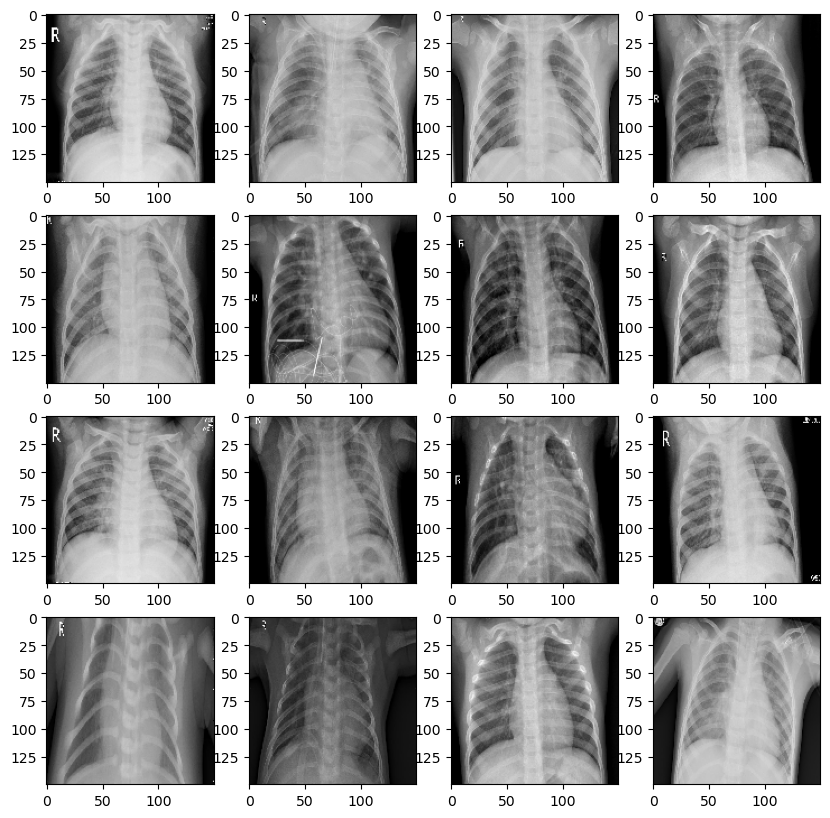

In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
_=plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    _= plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;    

In [ ]:
results = model.predict(images[0])